In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sediment Rainy

In [15]:
rainy_metrics = {
    "CNN GAT MLP": [0.9266, 21.4275, 18.8062, 11.1605],
    "CNN GNN MLP PG": [0.9570, 16.3939, 11.9147, 8.2470],
    "CNN GNN MLP": [0.9089, 23.8654, 20.9455, 13.4076],
    "Dual Attention": [0.8608, 29.4955, 24.6829, 13.3766],
    "GNN MLP AE": [0.9581, 15.8938, 14.4920, 10.1211],
    "GNN MLP": [0.9519, 17.3337, 15.7284, 10.9342],
    "Mixture of Experts": [0.9070, 24.1163, 18.4791, 12.0654],
    "Stacked CNN GNN MLP": [0.9240, 21.7977, 21.6243, 19.1205, 11.2678],
    "Transformer CNN GNN MLP": [0.9604, 15.7421, 13.2640, 9.52]
}

In [16]:
m = {"metrics": ['R2', "RMSE", "MAE", "SMAPE"]}

In [17]:
for v in m.values():
    for n in v:
        print(n)

R2
RMSE
MAE
SMAPE


In [18]:
models = [v for v in rainy_metrics.keys()]
r2 = [v[0] for v in rainy_metrics.values()]
rmse = [v[1] for v in rainy_metrics.values()]
mae = [v[2] for v in rainy_metrics.values()]
smape = [v[3] for v in rainy_metrics.values()]

In [19]:
df = pd.DataFrame()
df["Models"] = models
df["R2"] = r2
df["RMSE"] = rmse
df["MAE"] = mae
df["SMAPE"] = smape
df

Models      R2     RMSE      MAE    SMAPE
0              CNN GAT MLP  0.9266  21.4275  18.8062  11.1605
1           CNN GNN MLP PG  0.9570  16.3939  11.9147   8.2470
2              CNN GNN MLP  0.9089  23.8654  20.9455  13.4076
3           Dual Attention  0.8608  29.4955  24.6829  13.3766
4               GNN MLP AE  0.9581  15.8938  14.4920  10.1211
5                  GNN MLP  0.9519  17.3337  15.7284  10.9342
6       Mixture of Experts  0.9070  24.1163  18.4791  12.0654
7      Stacked CNN GNN MLP  0.9240  21.7977  21.6243  19.1205
8  Transformer CNN GNN MLP  0.9604  15.7421  13.2640   9.5200

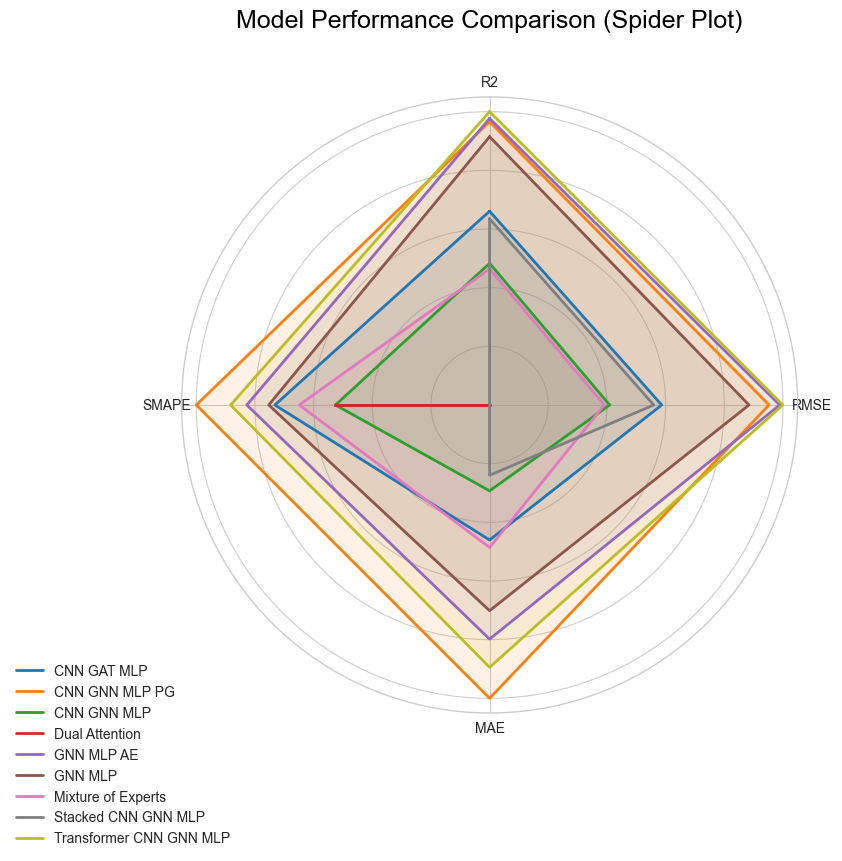

In [112]:
metrics = ['R2', 'RMSE', 'MAE', 'SMAPE']
df_normalized = df.copy()

for col in metrics:
    if col == 'R2':
        df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    else:
        df_normalized[col] = 1 - (df[col] - df[col].min()) / (df[col].max() - df[col].min())

num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Add the first angle to close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df_normalized.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Add the first value to close the shape
    
    label = row['Models']
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_yticklabels([])  # Hide the radial labels as they are not needed
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

ax.set_title('Model Performance Comparison (Spider Plot)', size=18, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)

plt.show()

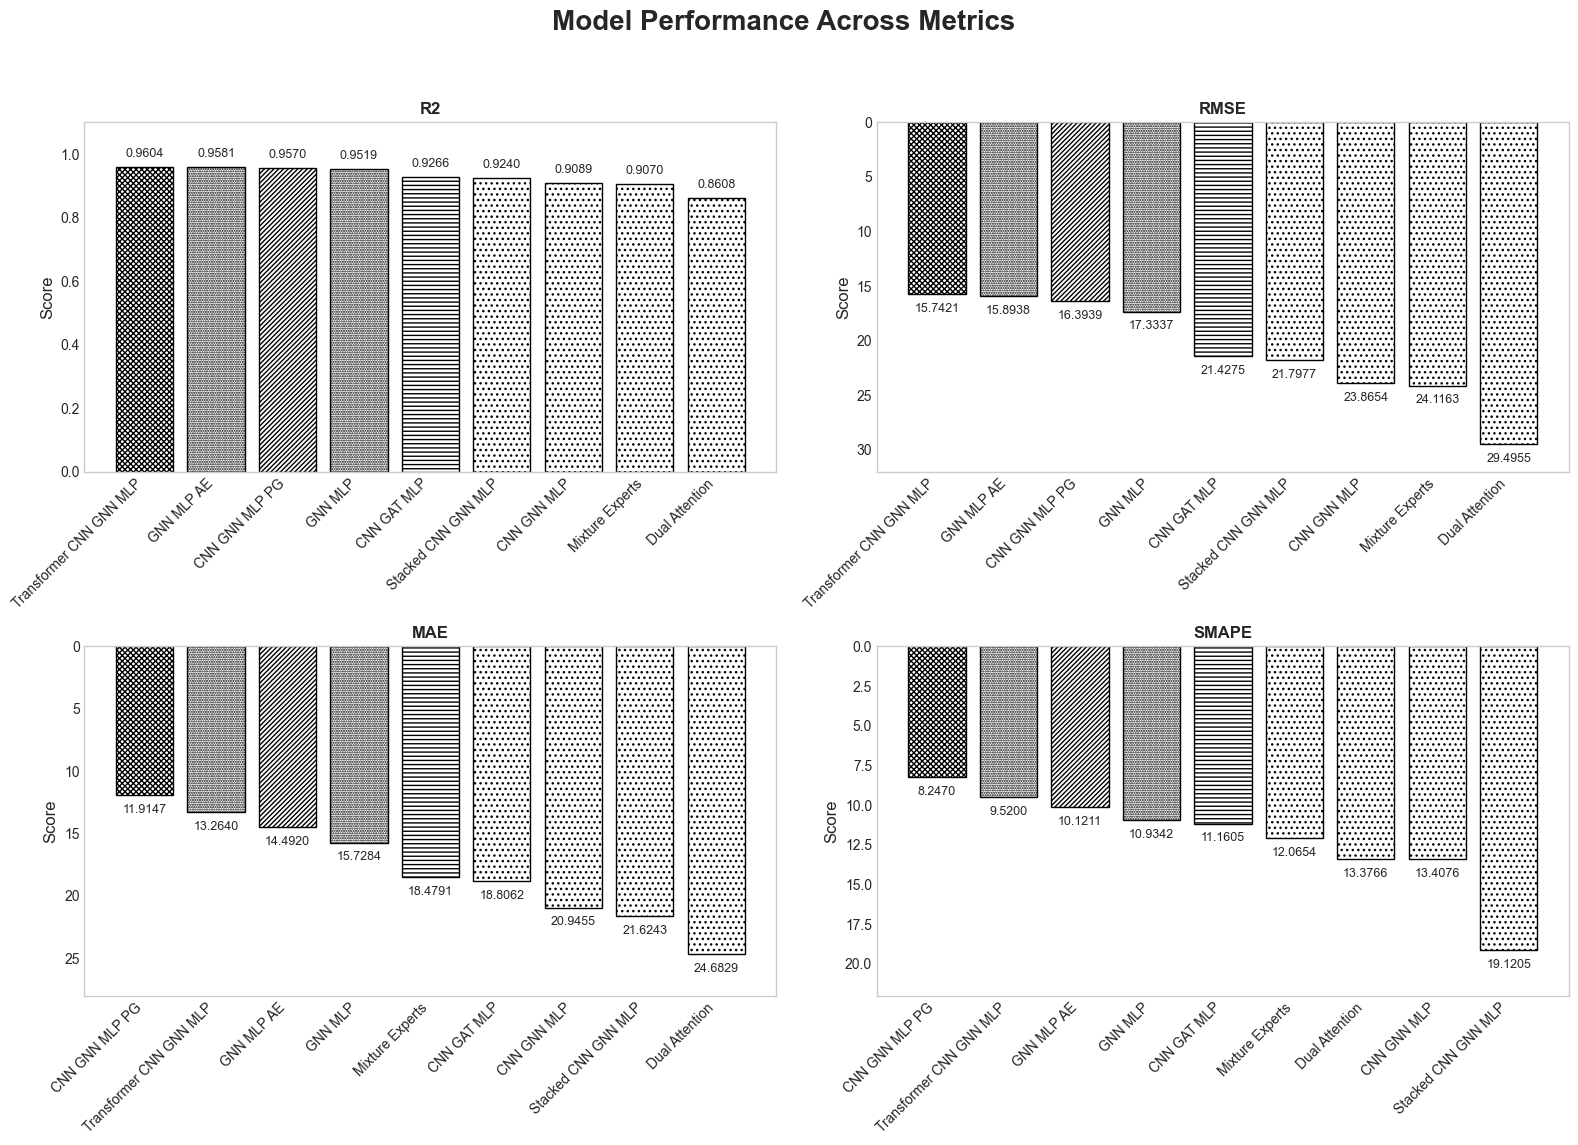

In [102]:
metrics = ['R2', 'RMSE', 'MAE', 'SMAPE']
num_metrics = len(metrics)
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

hatches = ['xxxxxx', '.......', '///////', '.......', '----', '...', '...', '...', '...']
bar_color = 'white'
edge_color = 'black'

bar_width = 0.8

for i, metric in enumerate(metrics):
    ax = axes[i]

    if metric == 'R2':
        sorted_df = df.sort_values(by=metric, ascending=False)
    else:
        sorted_df = df.sort_values(by=metric, ascending=True)

    sorted_models = sorted_df['Models'].values
    sorted_values = sorted_df[metric].values
    
    bars = ax.bar(sorted_models, sorted_values, color=bar_color, edgecolor=edge_color, width=bar_width)

    for j, bar in enumerate(bars):
        bar.set_hatch(hatches[j % len(hatches)])
    
    ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12)
    ax.set_xticks(range(len(sorted_models)))
    ax.set_xticklabels(sorted_models, rotation=45, ha='right', fontsize=10)
    
    ax.grid(False)
    
    for bar in bars:
        height = bar.get_height()
        if metric in ['R2']:
            offset = 5 
        else:
            offset = -15 
            
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, offset),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    if metric in 'SMAPE':
        ax.invert_yaxis()
        ax.set_ylim(22, 0)
    
    if metric in 'MAE':
        ax.invert_yaxis()
        ax.set_ylim(28, 0)
    
    if metric == "RMSE":
        ax.invert_yaxis()
        ax.set_ylim(32, 0)
        
    
    if metric == 'R2':
        ax.set_ylim(0, 1.1)

plt.suptitle('', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("SedimentRainyMetrics.png", dpi=500)
plt.show()

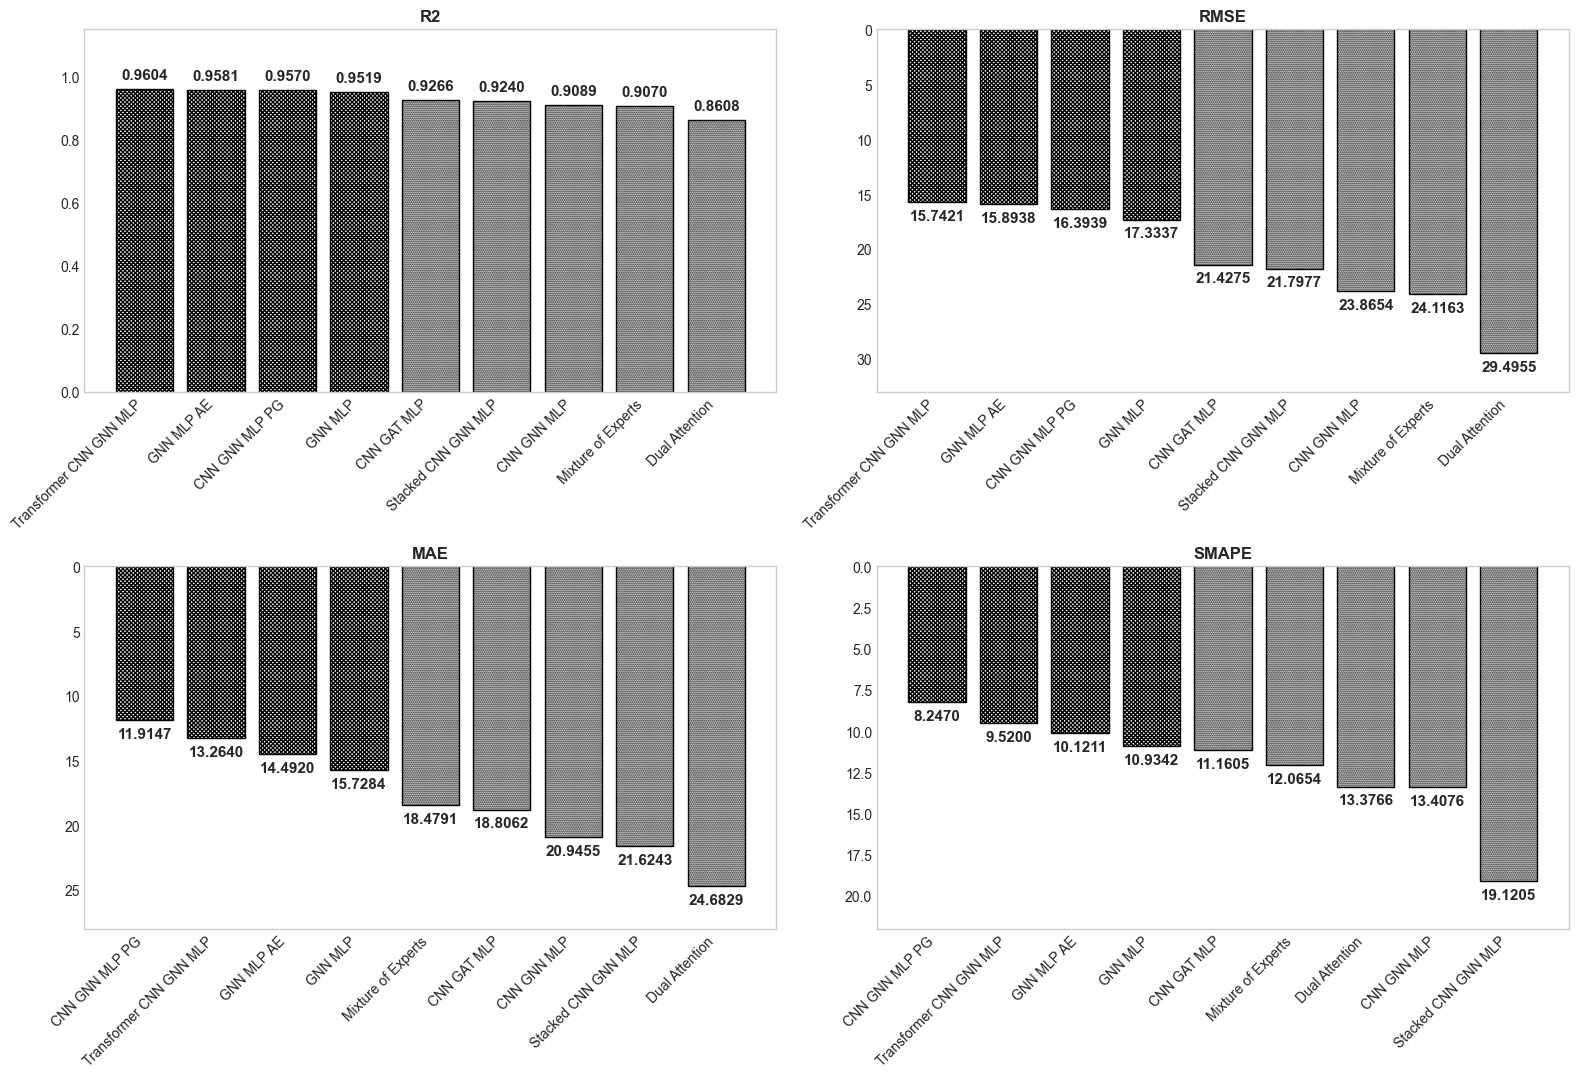

In [133]:
metrics = ['R2', 'RMSE', 'MAE', 'SMAPE']
num_metrics = len(metrics)
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

hatches = ['xxxxxxxx', 'xxxxxxxx','xxxxxxxx', 'xxxxxxxx', '........', '........', 
           '........', '........', '........']
bar_color = 'white'
edge_color = 'black'

bar_width = 0.8

for i, metric in enumerate(metrics):
    ax = axes[i]

    if metric == 'R2':
        sorted_df = df.sort_values(by=metric, ascending=False)
    else:
        sorted_df = df.sort_values(by=metric, ascending=True)

    sorted_models = sorted_df['Models'].values
    sorted_values = sorted_df[metric].values
    
    bars = ax.bar(sorted_models, sorted_values, color=bar_color, edgecolor=edge_color, width=bar_width)

    for j, bar in enumerate(bars):
        bar.set_hatch(hatches[j % len(hatches)])
    
    ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
    ax.set_ylabel('', fontsize=12)
    ax.set_xticks(range(len(sorted_models)))
    ax.set_xticklabels(sorted_models, rotation=45, ha='right', fontsize=10)
    
    ax.grid(False)
    
    for bar in bars:
        height = bar.get_height()
        if metric in ['R2']:
            offset = 5
        else:
            offset = -15
            
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, offset),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    if metric == 'SMAPE':
        ax.invert_yaxis()
        ax.set_ylim(22, 0)
    
    if metric == 'MAE':
        ax.invert_yaxis()
        ax.set_ylim(28, 0)
    
    if metric == "RMSE":
        ax.invert_yaxis()
        ax.set_ylim(33, 0)
        
    
    if metric == 'R2':
        ax.set_ylim(0, 1.15)

plt.suptitle('', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("SedimentRainyMetrics.png", dpi=500)
plt.show()

In [20]:
df.to_csv("metricsRainy.csv", index=False)

In [21]:
df.sort_values(by="R2", ascending=False)

Models      R2     RMSE      MAE    SMAPE
8  Transformer CNN GNN MLP  0.9604  15.7421  13.2640   9.5200
4               GNN MLP AE  0.9581  15.8938  14.4920  10.1211
1           CNN GNN MLP PG  0.9570  16.3939  11.9147   8.2470
5                  GNN MLP  0.9519  17.3337  15.7284  10.9342
0              CNN GAT MLP  0.9266  21.4275  18.8062  11.1605
7      Stacked CNN GNN MLP  0.9240  21.7977  21.6243  19.1205
2              CNN GNN MLP  0.9089  23.8654  20.9455  13.4076
6       Mixture of Experts  0.9070  24.1163  18.4791  12.0654
3           Dual Attention  0.8608  29.4955  24.6829  13.3766

## Top Models

### Transformer CNN GNN MLP

In [ ]:
Permutation
[('CNN_all_rasters', 0.2578508947803292),
 ('CNN_CrR', 0.15016727007971453),
 ('CNN_NiR', 0.13531716034211771),
 ('CNN_Pb_R', 0.13021924632401616),
 ('CNN_SandR', 0.11966719898391454),
 ('MLP_PbR', 0.08901021254208974),
 ('MLP_FeR', 0.06272385190629703),
 ('MLP_SiltR', 0.04643855384282791),
 ('CNN_AsR', 0.03766935675041616),
 ('MLP_ClayR', 0.034938749528848456),
 ('MLP_AsR', 0.03014764069040954),
 ('MLP_SandR', 0.027247810021662322),
 ('MLP_num_brick_field', 0.02454959275591817),
 ('CNN_SiltR', 0.017386010103978222),
 ('MLP_CrR', 0.012088846953317356),
 ('CNN_ClayR', 0.011763549919673988),
 ('MLP_NiR', 0.009316467689250318),
 ('CNN_CdR', 0.00872245429034102),
 ('MLP_num_industry', 0.007756740295390974),
 ('CNN_CuR', 0.005819625429118069),
 ('MLP_CdR', 0.0013922876417910013),
 ('MLP_MR', 0.00045439400898150684),
 ('MLP_hydro_dist_ind', 9.227514197185371e-09),
 ('CNN_bui', 0.0),
 ('CNN_ndsi', 0.0),
 ('CNN_savi', 0.0),
 ('CNN_ndbsi', 0.0),
 ('CNN_ui', 0.0),
 ('CNN_ndwi', 0.0),
 ('CNN_ndbi', 0.0),
 ('CNN_awei', 0.0),
 ('CNN_evi', 0.0),
 ('CNN_mndwi', 0.0),
 ('CNN_ndvi', 0.0),
 ('CNN_LULC2020', 0.0),
 ('CNN_LULC2021', 0.0),
 ('CNN_LULC2022', 0.0),
 ('CNN_LULC2019', 0.0),
 ('CNN_LULC2018', 0.0),
 ('CNN_LULC2017', 0.0),
 ('MLP_hydro_dist_brick', -2.8317152400703094e-08),
 ('GNN_distance_matrix', -1.9318892668929166e-05),
 ('MLP_CuR', -0.011893058700594872)]

Lime
[('CuR > 0.91', 40.67855942082697), 
 ('PbR > 0.63', 37.53052732623117), 
 ('num_brick_field <= 1.62', -34.862967632434255), 
 ('num_industry <= 1.89', -20.946583957188505), 
 ('0.07 < FeR <= 1.13', 17.824513617082882), 
 ('NiR > 1.28', 14.181492967802848), 
 ('CdR > 0.13', 8.209413672956847), 
 ('AsR <= -0.58', -6.0950522090983155), 
 ('-1.48 < ClayR <= -1.06', -5.979790040064445), 
 ('CrR > 0.68', 3.7817063355235003)]


In [52]:
t_permutation_data = [('CNN All Rasters', 0.2578508947803292),
 ('IDW Cr', 0.15016727007971453),
 ('IDW Ni', 0.13531716034211771),
 ('IDW Pb', 0.13021924632401616),
 ('IDW Sand', 0.11966719898391454),
 ('Pb', 0.08901021254208974),
 ('Fe', 0.06272385190629703),
 ('Silt', 0.04643855384282791),
 ('IDW As', 0.03766935675041616),
 ('Clay', 0.034938749528848456),
 ('As', 0.03014764069040954),
 ('Sand', 0.027247810021662322),
 ('Num Brick Field', 0.02454959275591817),
 ('IDW Silt', 0.017386010103978222),
 ('Cr', 0.012088846953317356),
 ('IDW Clay', 0.011763549919673988),
 ('Ni', 0.009316467689250318),
 ('IDW Cd', 0.00872245429034102),
 ('Num Industry', 0.007756740295390974),
 ('IDW Cu', 0.005819625429118069),
 ('Cd', 0.0013922876417910013),
 ('Moisture', 0.00045439400898150684),
 ('Hydro Dist Ind', 9.227514197185371e-09),
 ('Hydro Dist Brick', -2.8317152400703094e-08),
 ('GNN Distance Matrix', -1.9318892668929166e-05),
 ('Cu', -0.011893058700594872)]

t_lime_data = [('IDW Cu > 0.91', 40.67855942082697), 
 ('IDW Pb > 0.63', 37.53052732623117), 
 ('Num Brick Field <= 1.62', -34.862967632434255), 
 ('Num Industry <= 1.89', -20.946583957188505), 
 ('0.07 < IDW Fe <= 1.13', 17.824513617082882), 
 ('IDW Ni > 1.28', 14.181492967802848), 
 ('IDW Cd > 0.13', 8.209413672956847), 
 ('IDW As <= -0.58', -6.0950522090983155), 
 ('-1.48 < IDW Clay <= -1.06', -5.979790040064445), 
 ('IDW Cr > 0.68', 3.7817063355235003)]

t_permutation = pd.DataFrame(t_permutation_data, columns=['Feature', 'Importance'])
t_lime = pd.DataFrame(t_lime_data, columns=['Feature', 'Importance'])

In [53]:
t_permutation

Feature    Importance
0       CNN All Rasters  2.578509e-01
1                IDW Cr  1.501673e-01
2                IDW Ni  1.353172e-01
3                IDW Pb  1.302192e-01
4              IDW Sand  1.196672e-01
5                    Pb  8.901021e-02
6                    Fe  6.272385e-02
7                  Silt  4.643855e-02
8                IDW As  3.766936e-02
9                  Clay  3.493875e-02
10                   As  3.014764e-02
11                 Sand  2.724781e-02
12      Num Brick Field  2.454959e-02
13             IDW Silt  1.738601e-02
14                   Cr  1.208885e-02
15             IDW Clay  1.176355e-02
16                   Ni  9.316468e-03
17               IDW Cd  8.722454e-03
18         Num Industry  7.756740e-03
19               IDW Cu  5.819625e-03
20                   Cd  1.392288e-03
21             Moisture  4.543940e-04
22       Hydro Dist Ind  9.227514e-09
23     Hydro Dist Brick -2.831715e-08
24  GNN Distance Matrix -1.931889e-05
25                   Cu -1.189306e-02

In [54]:
t_permutation.to_csv("FeatureImportance/t_permutation.csv")
t_lime.to_csv("FeatureImportance/t_lime.csv")

In [ ]:
Permutation
MLP_Branch_Overall: 2.103926
PbR: 0.321333
CuR: 0.116045
NiR: 0.103530
CdR: 0.042671
ClayR: 0.036134
AsR: 0.028143
num_industry: 0.014462
CrR: 0.008070
SiltR: 0.002536
GNN_Branch_Overall: 0.000632
MR: 0.000575
hydro_dist_brick: -0.000000
hydro_dist_ind: -0.000000
SandR: -0.003032
num_brick_field: -0.008298
FeR: -0.013229

LIME
Feature: CdR <= 2.10     | Weight:   -11.0612
Feature: num_industry > 1.00 | Weight:    -5.1669
Feature: SandR > 46.99   | Weight:    -5.0592
Feature: AsR > 15.78     | Weight:    -4.3109
Feature: ClayR <= 23.23  | Weight:    -4.2326
Feature: SiltR <= 29.11  | Weight:     3.7679
Feature: 29.59 < NiR <= 40.56 | Weight:     3.4908
Feature: hydro_dist_ind <= 509.29 | Weight:    -2.7672
Feature: hydro_dist_brick <= 887.50 | Weight:     2.5258
Feature: num_brick_field > 1.00 | Weight:     1.7069
Feature: 31.75 < MR <= 33.17 | Weight:    -1.6101
Feature: 53.03 < CrR <= 67.08 | Weight:     1.3195
Feature: 32253.00 < FeR <= 41226.06 | Weight:     0.8557
Feature: 69.42 < CuR <= 82.96 | Weight:    -0.5971
Feature: 51.99 < PbR <= 99.19 | Weight:    -0.5325


In [9]:
gma_permutation_data = [
    ('MLP Branch Overall', 2.103926),
    ('IDW Pb', 0.321333),
    ('IDW Cu', 0.116045),
    ('IDW Ni', 0.103530),
    ('IDW Cd', 0.042671),
    ('IDW Clay', 0.036134),
    ('IDW As', 0.028143),
    ('Num Industry', 0.014462),
    ('IDW Cr', 0.008070),
    ('IDW Silt', 0.002536),
    ('GNN Branch Overall', 0.000632),
    ('Moisture', 0.000575),
    ('Hydro Dist Brick', -0.000000),
    ('Hydro Dist Ind', -0.000000),
    ('IDW Sand', -0.003032),
    ('Num Brick Field', -0.008298),
    ('IDW Fe', -0.013229)
]

gma_lime_data_str = """
Feature: IDW Cd <= 2.10 | Weight: -11.0612
Feature: Num Industry > 1.00 | Weight: -5.1669
Feature: IDW Sand > 46.99 | Weight: -5.0592
Feature: IDW As > 15.78 | Weight: -4.3109
Feature: IDW Clay <= 23.23 | Weight: -4.2326
Feature: IDW Silt <= 29.11 | Weight: 3.7679
Feature: 29.59 < IDW Ni <= 40.56 | Weight: 3.4908
Feature: Hydro Dist Ind <= 509.29 | Weight: -2.7672
Feature: Hydro Dist Brick <= 887.50 | Weight: 2.5258
Feature: Num Brick Field > 1.00 | Weight: 1.7069
Feature: 31.75 < IDW Moisture <= 33.17 | Weight: -1.6101
Feature: 53.03 < IDW Cr <= 67.08 | Weight: 1.3195
Feature: 32253.00 < IDW Fe <= 41226.06 | Weight: 0.8557
Feature: 69.42 < IDW Cu <= 82.96 | Weight: -0.5971
Feature: 51.99 < IDW Pb <= 99.19 | Weight: -0.5325
"""

def parse_lime_data(data_str):
    lines = data_str.strip().split('\n')
    parsed_data = []
    for line in lines:
        parts = line.split('|')
        feature = parts[0].replace('Feature:', '').strip()
        weight = float(parts[1].replace('Weight:', '').strip())
        parsed_data.append([feature, weight])
    return parsed_data

gma_permutation = pd.DataFrame(gma_permutation_data, columns=['Feature', 'Importance'])
gma_lime = pd.DataFrame(parse_lime_data(gma_lime_data_str), columns=['Feature', 'Importance'])

In [10]:
gma_permutation

Feature  Importance
0   MLP Branch Overall    2.103926
1               IDW Pb    0.321333
2               IDW Cu    0.116045
3               IDW Ni    0.103530
4               IDW Cd    0.042671
5             IDW Clay    0.036134
6               IDW As    0.028143
7         Num Industry    0.014462
8               IDW Cr    0.008070
9             IDW Silt    0.002536
10  GNN Branch Overall    0.000632
11            Moisture    0.000575
12    Hydro Dist Brick   -0.000000
13      Hydro Dist Ind   -0.000000
14            IDW Sand   -0.003032
15     Num Brick Field   -0.008298
16              IDW Fe   -0.013229

In [11]:
gma_permutation.to_csv("FeatureImportance/gma_permutation.csv")
gma_lime.to_csv("FeatureImportance/gma_lime.csv")

In [ ]:
--- Permutation Feature Importance---
MLP: num_brick_field          : 0.005726
CNN: IDW Silt                    : 0.005635
MLP: Pb                      : 0.005544
MLP: Clay                    : 0.005353
CNN: IDW Cr                      : 0.005347
MLP: PMF_Factor2              : 0.004346
MLP: Cr                      : 0.002488
MLP: Moisture                : 0.001582
MLP: Ni                      : 0.001574
CNN: IDW Pb                     : 0.000880
MLP: PMF1 GWR                 : 0.000315
MLP: GWR Adjusted             : 0.000214
MLP: Hydro Dist Brick         : 0.00000024
MLP: hydro Dist Ind           : -0.00000012
GNN: Spatial Features         : -0.000016
MLP: Silt                    : -0.000091
MLP: PMF2 GWR                 : -0.000180
MLP: PMF Factor1              : -0.000461
MLP: PMF0 GWR                 : -0.000538
MLP: Sand                    : -0.000999
MLP: Num Industry             : -0.001112
MLP: PMF Factor0              : -0.001390
MLP: Cu                      : -0.001871
MLP: Cd                      : -0.002022
CNN: IDW Cd                      : -0.003279
CNN: IDW Clay                    : -0.003330
CNN: IDW Ni                      : -0.003473
CNN: IDW Sand                    : -0.003578
MLP: Fe                      : -0.004097
CNN: IDW Cu                      : -0.004545
CNN: IDW As                      : -0.006383

LIME
CdR > 0.13                              : 0.381890
NiR > 1.28                              : -0.193588
PbR > 0.63                              : 0.156228
num_industry <= 1.89                    : -0.152345
PMF0_GWR > 0.82                         : 0.146799
-1.16 < SiltR <= -0.94                  : -0.079977
num_brick_field <= 1.62                 : -0.079132
CrR > 0.68                              : -0.075136
-0.24 < PMF_Factor2 <= 0.44             : -0.047808
As > 0.64                               : 0.040917

In [49]:
gm_permutation_data_str = """
Num Brick Field          : 0.005726
IDW Silt                    : 0.005635
Pb                      : 0.005544
Clay                    : 0.005353
IDW Cr                      : 0.005347
PMF_Factor2              : 0.004346
Cr                      : 0.002488
Moisture                : 0.001582
Ni                      : 0.001574
IDW Pb                     : 0.000880
PMF1 GWR                 : 0.000315
GWR Adjusted             : 0.000214
Hydro Dist Brick         : 0.00000024
Hydro Dist Ind           : -0.00000012
GNN Spatial Features         : -0.000016
Silt                    : -0.000091
PMF2 GWR                 : -0.000180
PMF Factor1              : -0.000461
PMF0 GWR                 : -0.000538
Sand                    : -0.000999
Num Industry             : -0.001112
PMF Factor0              : -0.001390
Cu                      : -0.001871
Cd                      : -0.002022
Fe                      : -0.004097
IDW As                      : -0.006383
"""

gm_lime_data_str = """
IDW Cd > 0.13: 0.381890
IDW Ni > 1.28: -0.193588
IDW Pb > 0.63: 0.156228
Num Industry <= 1.89: -0.152345
PMF0 GWR > 0.82: 0.146799
-1.16 < IDW Silt <= -0.94: -0.079977
Num Brick Field <= 1.62: -0.079132
IDW Cr > 0.68: -0.075136
-0.24 < PMF Factor2 <= 0.44: -0.047808
IDW As > 0.64: 0.040917
"""

# Helper function to parse the new data format
def parse_data_new_format(data_str):
    lines = data_str.strip().split('\n')
    parsed_data = []
    for line in lines:
        if line.strip() == "":
            continue
        parts = line.rsplit(':', 1)
        feature = parts[0].strip()
        weight = float(parts[1].strip())
        parsed_data.append([feature, weight])
    return parsed_data

cgmp_permutation = pd.DataFrame(parse_data_new_format(gm_permutation_data_str), columns=['Feature', 'Importance'])
cgmp_lime = pd.DataFrame(parse_data_new_format(gm_lime_data_str), columns=['Feature', 'Importance'])

In [50]:
cgmp_lime

Feature  Importance
0                IDW Cd > 0.13    0.381890
1                IDW Ni > 1.28   -0.193588
2                IDW Pb > 0.63    0.156228
3         Num Industry <= 1.89   -0.152345
4              PMF0 GWR > 0.82    0.146799
5    -1.16 < IDW Silt <= -0.94   -0.079977
6      Num Brick Field <= 1.62   -0.079132
7                IDW Cr > 0.68   -0.075136
8  -0.24 < PMF Factor2 <= 0.44   -0.047808
9                IDW As > 0.64    0.040917

In [51]:
cgmp_permutation.to_csv("FeatureImportance/cgmp_permutation.csv")
cgmp_lime.to_csv("FeatureImportance/cgmp_lime.csv")

In [141]:
pfi = [('CNN_all_rasters', 0.2578508947803292),
 ('CNN_CrR', 0.15016727007971453),
 ('CNN_NiR', 0.13531716034211771),
 ('CNN_Pb_R', 0.13021924632401616),
 ('CNN_SandR', 0.11966719898391454),
 ('MLP_PbR', 0.08901021254208974),
 ('MLP_FeR', 0.06272385190629703),
 ('MLP_SiltR', 0.04643855384282791),
 ('CNN_AsR', 0.03766935675041616),
 ('MLP_ClayR', 0.034938749528848456),
 ('MLP_AsR', 0.03014764069040954),
 ('MLP_SandR', 0.027247810021662322),
 ('MLP_num_brick_field', 0.02454959275591817),
 ('CNN_SiltR', 0.017386010103978222),
 ('MLP_CrR', 0.012088846953317356),
 ('CNN_ClayR', 0.011763549919673988),
 ('MLP_NiR', 0.009316467689250318),
 ('CNN_CdR', 0.00872245429034102),
 ('MLP_num_industry', 0.007756740295390974),
 ('CNN_CuR', 0.005819625429118069),
 ('MLP_CdR', 0.0013922876417910013),
 ('MLP_MR', 0.00045439400898150684),
 ('MLP_hydro_dist_ind', 9.227514197185371e-09),
 ('CNN_bui', 0.0),
 ('CNN_ndsi', 0.0),
 ('CNN_savi', 0.0),
 ('CNN_ndbsi', 0.0),
 ('CNN_ui', 0.0),
 ('CNN_ndwi', 0.0),
 ('CNN_ndbi', 0.0),
 ('CNN_awei', 0.0),
 ('CNN_evi', 0.0),
 ('CNN_mndwi', 0.0),
 ('CNN_ndvi', 0.0),
 ('CNN_LULC2020', 0.0),
 ('CNN_LULC2021', 0.0),
 ('CNN_LULC2022', 0.0),
 ('CNN_LULC2019', 0.0),
 ('CNN_LULC2018', 0.0),
 ('CNN_LULC2017', 0.0),
 ('MLP_hydro_dist_brick', -2.8317152400703094e-08),
 ('GNN_distance_matrix', -1.9318892668929166e-05),
 ('MLP_CuR', -0.011893058700594872)]

In [143]:
intrinsic_gbr = [('PbR', 0.853253205390119), ('NiR', 0.09881322808711815), ('AsR', 0.012801277462415188), ('CrR', 0.012074729332910593), ('CuR', 0.01167791295612921), ('CdR', 0.003467315801338547), ('SiltR', 0.003131958064428256), ('SandR', 0.0020126438510968936), ('hydro_dist_ind', 0.0011694059771822746), ('ClayR', 0.0005486100053203283), ('FeR', 0.0004861574720681423), ('MR', 0.0004132332485617142), ('hydro_dist_brick', 0.00014412827470258125), ('num_brick_field', 6.194076609055788e-06), ('num_industry', 0.0)]
lime = [('CuR > 0.91', 40.67855942082697), ('PbR > 0.63', 37.53052732623117), ('num_brick_field <= 1.62', -34.862967632434255), ('num_industry <= 1.89', -20.946583957188505), ('0.07 < FeR <= 1.13', 17.824513617082882), ('NiR > 1.28', 14.181492967802848), ('CdR > 0.13', 8.209413672956847), ('AsR <= -0.58', -6.0950522090983155), ('-1.48 < ClayR <= -1.06', -5.979790040064445), ('CrR > 0.68', 3.7817063355235003)]

In [145]:
intrinsic_gbr[0][0]

'PbR'

In [147]:
df = pd.DataFrame(pfi, columns=['feature_name', 'value'])

df['model_type'] = df['feature_name'].apply(lambda x: x.split('_')[0])
model_order = ['CNN', 'MLP', 'GNN']

df['model_type'] = pd.Categorical(df['model_type'], categories=model_order, ordered=True)
sorted_df = df.sort_values(by=['model_type', 'value'], ascending=[True, False])

sorted_pfi = list(zip(sorted_df['feature_name'], sorted_df['value']))

print("===== Permutation Based ======")
for item in sorted_pfi:
    print(item)

===== Permutation Based ======
('CNN_all_rasters', 0.2578508947803292)
('CNN_CrR', 0.15016727007971453)
('CNN_NiR', 0.13531716034211771)
('CNN_Pb_R', 0.13021924632401616)
('CNN_SandR', 0.11966719898391454)
('CNN_AsR', 0.03766935675041616)
('CNN_SiltR', 0.017386010103978222)
('CNN_ClayR', 0.011763549919673988)
('CNN_CdR', 0.00872245429034102)
('CNN_CuR', 0.005819625429118069)
('CNN_bui', 0.0)
('CNN_ndsi', 0.0)
('CNN_savi', 0.0)
('CNN_ndbsi', 0.0)
('CNN_ui', 0.0)
('CNN_ndwi', 0.0)
('CNN_ndbi', 0.0)
('CNN_awei', 0.0)
('CNN_evi', 0.0)
('CNN_mndwi', 0.0)
('CNN_ndvi', 0.0)
('CNN_LULC2020', 0.0)
('CNN_LULC2021', 0.0)
('CNN_LULC2022', 0.0)
('CNN_LULC2019', 0.0)
('CNN_LULC2018', 0.0)
('CNN_LULC2017', 0.0)
('MLP_PbR', 0.08901021254208974)
('MLP_FeR', 0.06272385190629703)
('MLP_SiltR', 0.04643855384282791)
('MLP_ClayR', 0.034938749528848456)
('MLP_AsR', 0.03014764069040954)
('MLP_SandR', 0.027247810021662322)
('MLP_num_brick_field', 0.02454959275591817)
('MLP_CrR', 0.012088846953317356)
('MLP_NiR

In [148]:
df = pd.DataFrame(lime, columns=["feature", "value"])
df

feature      value
0               CuR > 0.91  40.678559
1               PbR > 0.63  37.530527
2  num_brick_field <= 1.62 -34.862968
3     num_industry <= 1.89 -20.946584
4       0.07 < FeR <= 1.13  17.824514
5               NiR > 1.28  14.181493
6               CdR > 0.13   8.209414
7             AsR <= -0.58  -6.095052
8   -1.48 < ClayR <= -1.06  -5.979790
9               CrR > 0.68   3.781706

In [149]:
df = pd.DataFrame(intrinsic_gbr, columns=["feature", "value"])
df

feature     value
0                PbR  0.853253
1                NiR  0.098813
2                AsR  0.012801
3                CrR  0.012075
4                CuR  0.011678
5                CdR  0.003467
6              SiltR  0.003132
7              SandR  0.002013
8     hydro_dist_ind  0.001169
9              ClayR  0.000549
10               FeR  0.000486
11                MR  0.000413
12  hydro_dist_brick  0.000144
13   num_brick_field  0.000006
14      num_industry  0.000000

In [152]:
df = pd.read_csv("TransformerFIB.csv")
df.head()

Rank                        Method          Feature  Importance_Value
0     1  Permutation-based Importance  CNN_all_rasters             0.258
1     2  Permutation-based Importance          CNN_CrR             0.150
2     3  Permutation-based Importance          CNN_NiR             0.135
3     4  Permutation-based Importance          CNN_PbR             0.130
4     5  Permutation-based Importance        CNN_SandR             0.120

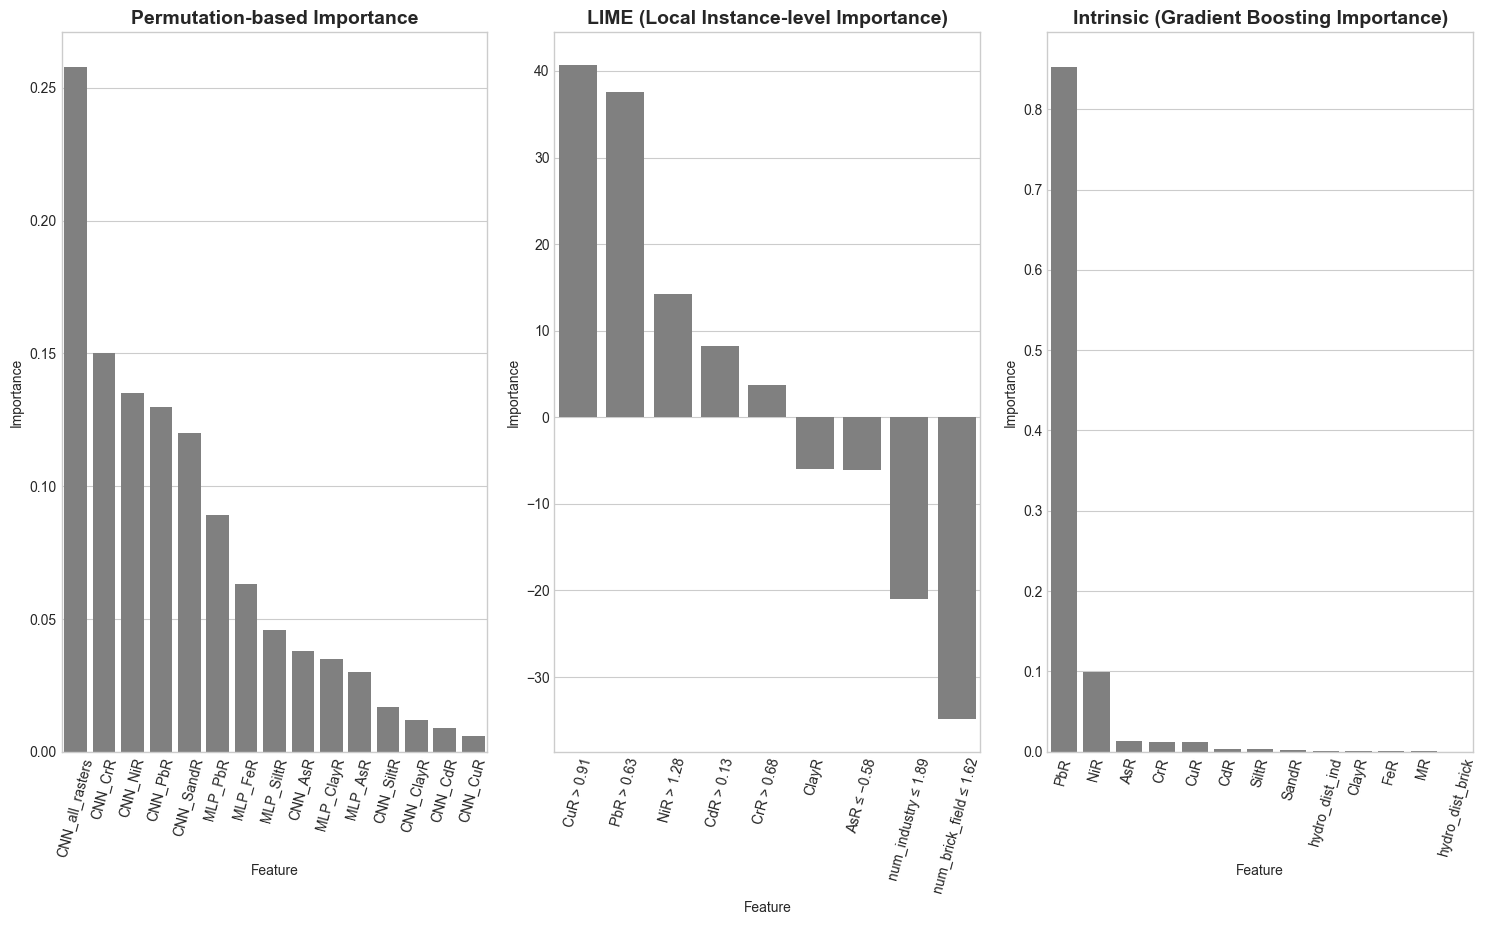

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unique methods
methods = df["Method"].unique()

# Create subplots without shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=False)

for ax, method in zip(axes, methods):
    subset = df[df["Method"] == method].dropna()
    
    # Sort features by importance (descending) within each method
    order = subset.sort_values("Importance_Value", ascending=False)["Feature"]
    
    sns.barplot(
        data=subset,
        x="Feature",
        y="Importance_Value",
        order=order,
        ax=ax,
        color="grey"
    )
    
    ax.set_title(f"{method}", fontsize=14, weight="bold")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Importance")
    ax.tick_params(axis="x", rotation=75)

plt.suptitle("", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Data Preprocessing 

# Sediment Winter

In [1]:
winter_metrics = {
    "CNN GAT MLP": [0.9177, 20.3767, 14.8821, 10.2815],
    "CNN GNN MLP PG": [0.9541, 16.9342, 15.1297, 4.9237],
    "CNN GNN MLP": [0.8768, 27.7525, 21.4899, 10.1928],
    "Dual Attention": [0.8402, 31.9021, 29.2886, 19.2817],
    "GNN MLP AE": [0.9718, 8.0434, 7.3433, 5.8565],
    "GNN MLP": [0.9705, 11.0783, 8.2154, 5.9768],
    "Mixture of Experts": [0.97, 13.7056, 10.0531, 6.4779],
    "Stacked CNN GNN MLP": [0.9685, 14.0418, 10.9236, 6.2405],
    "Transformer CNN GNN MLP": [0.9721, 7.9921, 6.5526, 4.4510]
}

In [2]:
m = {"metrics": ['R2', "RMSE", "MAE", "SMAPE"]}

In [3]:
for v in m.values():
    for n in v:
        print(n)

R2
RMSE
MAE
SMAPE


In [4]:
models = [v for v in winter_metrics.keys()]
r2 = [v[0] for v in winter_metrics.values()]
rmse = [v[1] for v in winter_metrics.values()]
mae = [v[2] for v in winter_metrics.values()]
smape = [v[3] for v in winter_metrics.values()]

In [7]:
df = pd.DataFrame()
df["Models"] = models
df["R2"] = r2
df["RMSE"] = rmse
df["MAE"] = mae
df["SMAPE"] = smape
df

Models      R2     RMSE      MAE    SMAPE
0              CNN GAT MLP  0.9177  20.3767  14.8821  10.2815
1           CNN GNN MLP PG  0.9541  16.9342  15.1297   4.9237
2              CNN GNN MLP  0.8768  27.7525  21.4899  10.1928
3           Dual Attention  0.8402  31.9021  29.2886  19.2817
4               GNN MLP AE  0.9718   8.0434   7.3433   5.8565
5                  GNN MLP  0.9705  11.0783   8.2154   5.9768
6       Mixture of Experts  0.9700  13.7056  10.0531   6.4779
7      Stacked CNN GNN MLP  0.9685  14.0418  10.9236   6.2405
8  Transformer CNN GNN MLP  0.9721   7.9921   6.5526   4.4510

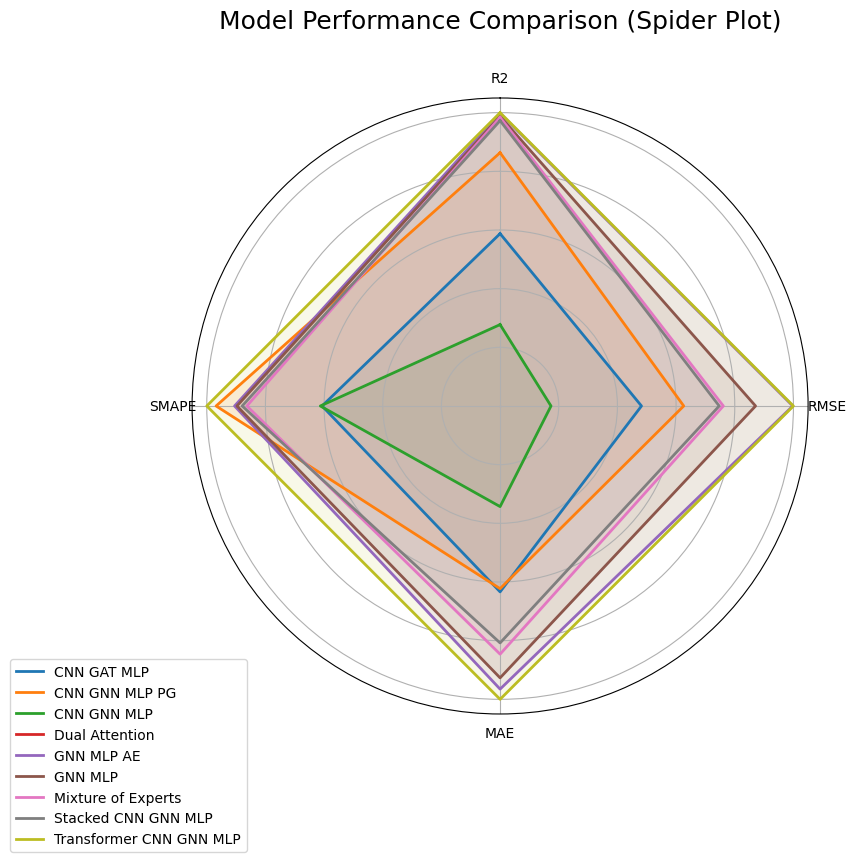

In [8]:
metrics = ['R2', 'RMSE', 'MAE', 'SMAPE']
df_normalized = df.copy()

for col in metrics:
    if col == 'R2':
        df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    else:
        df_normalized[col] = 1 - (df[col] - df[col].min()) / (df[col].max() - df[col].min())

num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Add the first angle to close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df_normalized.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Add the first value to close the shape
    
    label = row['Models']
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_yticklabels([])  # Hide the radial labels as they are not needed
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

ax.set_title('Model Performance Comparison (Spider Plot)', size=18, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)

plt.show()

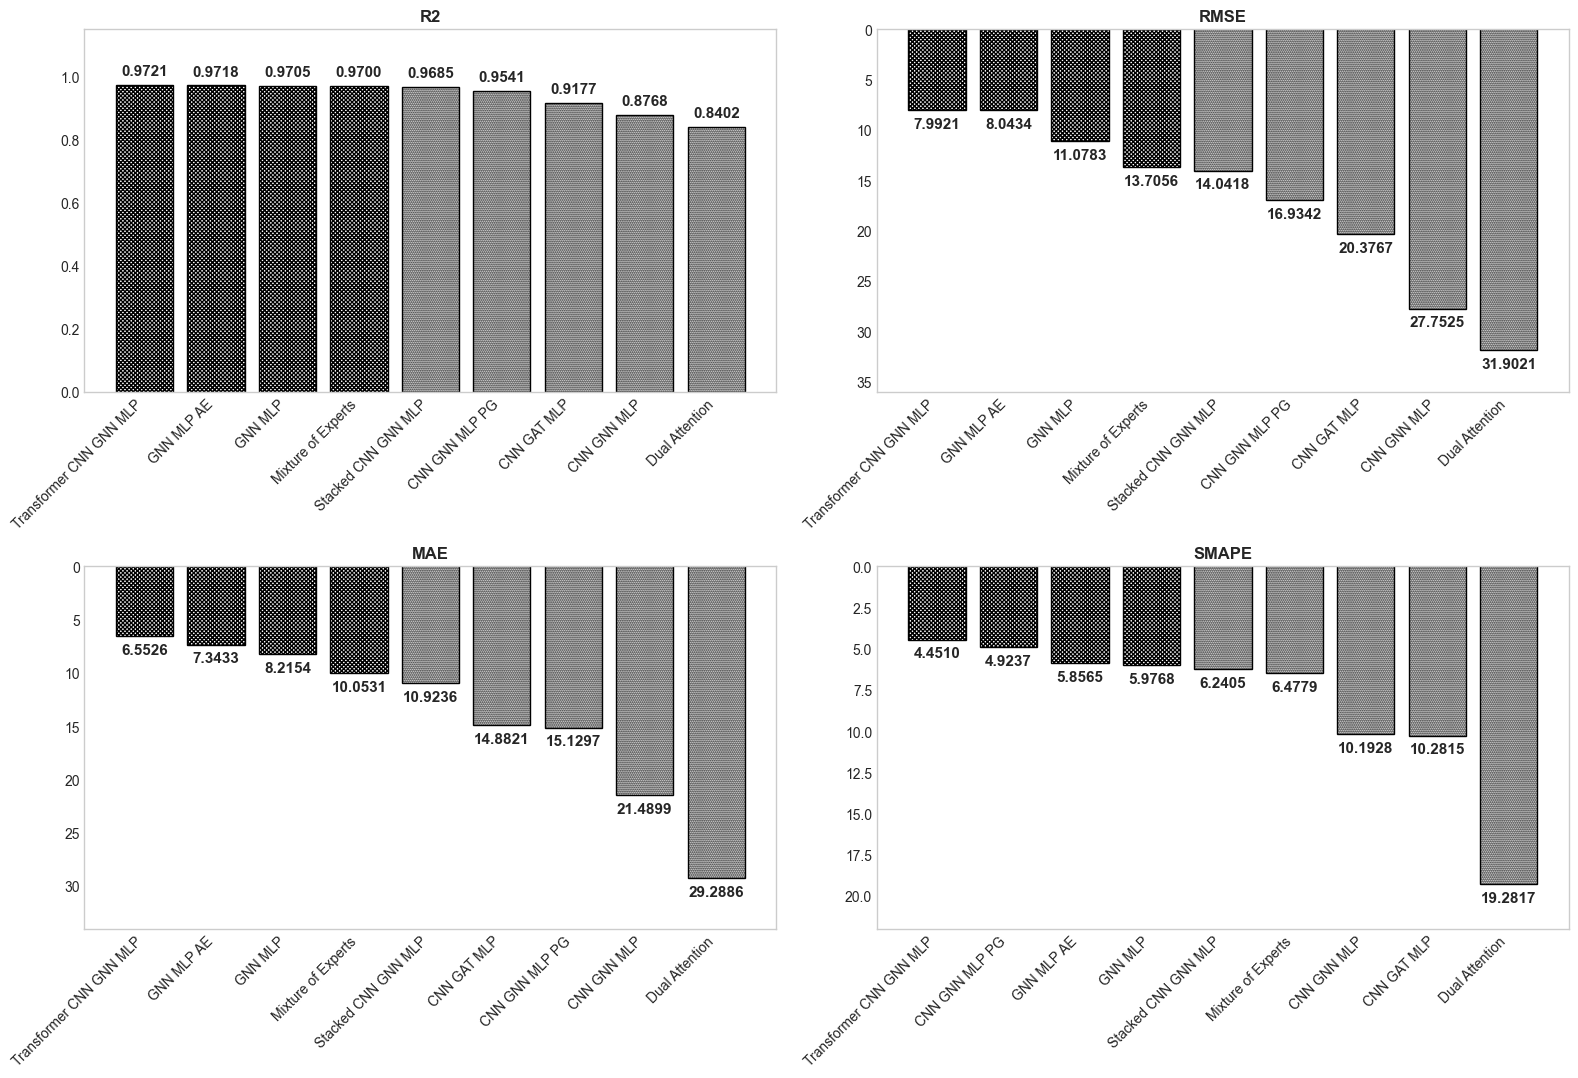

In [14]:
metrics = ['R2', 'RMSE', 'MAE', 'SMAPE']
num_metrics = len(metrics)
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

hatches = ['xxxxxxxx', 'xxxxxxxx','xxxxxxxx', 'xxxxxxxx', '........', '........', 
           '........', '........', '........']
bar_color = 'white'
edge_color = 'black'

bar_width = 0.8

for i, metric in enumerate(metrics):
    ax = axes[i]

    if metric == 'R2':
        sorted_df = df.sort_values(by=metric, ascending=False)
    else:
        sorted_df = df.sort_values(by=metric, ascending=True)

    sorted_models = sorted_df['Models'].values
    sorted_values = sorted_df[metric].values
    
    bars = ax.bar(sorted_models, sorted_values, color=bar_color, edgecolor=edge_color, width=bar_width)

    for j, bar in enumerate(bars):
        bar.set_hatch(hatches[j % len(hatches)])
    
    ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
    ax.set_ylabel('', fontsize=12)
    ax.set_xticks(range(len(sorted_models)))
    ax.set_xticklabels(sorted_models, rotation=45, ha='right', fontsize=10)
    
    ax.grid(False)
    
    for bar in bars:
        height = bar.get_height()
        if metric in ['R2']:
            offset = 5
        else:
            offset = -15
            
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, offset),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    if metric == 'SMAPE':
        ax.invert_yaxis()
        ax.set_ylim(22, 0)
    
    if metric == 'MAE':
        ax.invert_yaxis()
        ax.set_ylim(34, 0)
    
    if metric == "RMSE":
        ax.invert_yaxis()
        ax.set_ylim(36, 0)
        
    
    if metric == 'R2':
        ax.set_ylim(0, 1.15)

plt.suptitle('', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("SedimentWinterMetrics.png", dpi=500)
plt.show()

In [11]:
df.to_csv("metricsWinter.csv", index=False)

In [12]:
df.sort_values(by="R2", ascending=False)

Models      R2     RMSE      MAE    SMAPE
8  Transformer CNN GNN MLP  0.9721   7.9921   6.5526   4.4510
4               GNN MLP AE  0.9718   8.0434   7.3433   5.8565
5                  GNN MLP  0.9705  11.0783   8.2154   5.9768
6       Mixture of Experts  0.9700  13.7056  10.0531   6.4779
7      Stacked CNN GNN MLP  0.9685  14.0418  10.9236   6.2405
1           CNN GNN MLP PG  0.9541  16.9342  15.1297   4.9237
0              CNN GAT MLP  0.9177  20.3767  14.8821  10.2815
2              CNN GNN MLP  0.8768  27.7525  21.4899  10.1928
3           Dual Attention  0.8402  31.9021  29.2886  19.2817

## Ground Truth

In [30]:
rainy_data = pd.read_csv("PredTest.csv", index_col='Unnamed: 0')
winter_data = pd.read_csv("../SedimentWinter/TruePred/transformer.csv", index_col='Unnamed: 0')

In [31]:
rainy_data, winter_data

(    Longitude   Latitude   YTest      YPred
 0   90.245390  23.802571  133.26  117.47197
 1   90.246581  23.754298  115.16  122.80994
 2   90.277077  23.702157  107.92  134.30444
 3   90.388647  23.628000  126.51  107.89707
 4   90.350573  23.877666  147.44  189.75235
 5   90.342201  23.826986  120.30  242.04716
 6   90.339601  23.792572  120.94  220.45291
 7   90.359274  23.716059  202.03  316.48790
 8   90.482538  23.764005  320.26  116.16356
 9   90.484506  23.808202  225.63  103.95830
 10  90.548478  23.832710  340.09  185.55151
 11  90.514128  23.628420  386.12  179.07095,
     Longitude   Latitude   YTrue      YPred
 0   90.520000  23.640000  235.85  219.51791
 1   90.210000  23.920000  132.17  132.06616
 2   90.550000  23.830000  186.20  182.32515
 3   90.340000  23.980000  191.46  193.27328
 4   90.230000  23.870000  116.02  130.56157
 5   90.160000  23.710000  125.98  126.59527
 6   90.410000  23.760000  204.14  196.12065
 7   90.290000  23.810000  197.93  195.78714
 8   90.3

In [32]:
winter_data = winter_data[:12]

In [33]:
rainy_data.shape

(12, 4)

In [34]:
winter_data.shape

(12, 4)

In [16]:
rainy.columns, winter.columns

(Index(['Longitude', 'Latitude', 'YTest', 'YPred'], dtype='object'),
 Index(['Longitude', 'Latitude', 'YTrue', 'YPred'], dtype='object'))

In [76]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Start of User Data Loading ---
# The data provided by the user is a string representation of two DataFrames.
# We need to parse this string to create the pandas DataFrames.
# This code handles the data parsing and column name discrepancy.

# Rainy season data string
rainy_data_str = """
   Longitude   Latitude   YTrue      YPred
0   90.245390  23.802571  133.26  130.47197
1   90.246581  23.754298  115.16  122.80994
2   90.277077  23.702157  107.92  110.30444
3   90.388647  23.628000  126.51  127.89707
4   90.350573  23.877666  147.44  149.75235
5   90.342201  23.826986  120.30  125.04716
6   90.339601  23.792572  120.94  130.45291
7   90.359274  23.716059  202.03  210.48790
8   90.482538  23.764005  320.26  316.16356
9   90.484506  23.808202  225.63  203.95830
10  90.548478  23.832710  340.09  385.55151
11  90.514128  23.628420  386.12  379.07095
"""

# Winter season data string
winter_data_str = """
   Longitude   Latitude   YTrue      YPred
0   90.210000  23.920000  132.17  132.06616
1   90.340000  23.980000  191.46  193.27328
2   90.160000  23.710000  125.98  126.59527
3   90.290000  23.810000  197.93  195.78714
4   90.340000  23.790000  229.02  229.87694
5  90.310000  23.800000  224.21  222.49658
7  90.260000  23.750000  127.25  123.55094
8  90.240000  23.960000  134.23  139.54572
9  90.420000  23.890000  204.28  205.59445
10  90.470000  23.900000  136.98  138.80333
11  90.210000  23.760000  123.41  125.15000
"""

# Read the string data into DataFrames
from io import StringIO
rainy_data = pd.read_csv(StringIO(rainy_data_str.strip()), sep=r'\s+')
winter_data = pd.read_csv(StringIO(winter_data_str.strip()), sep=r'\s+')

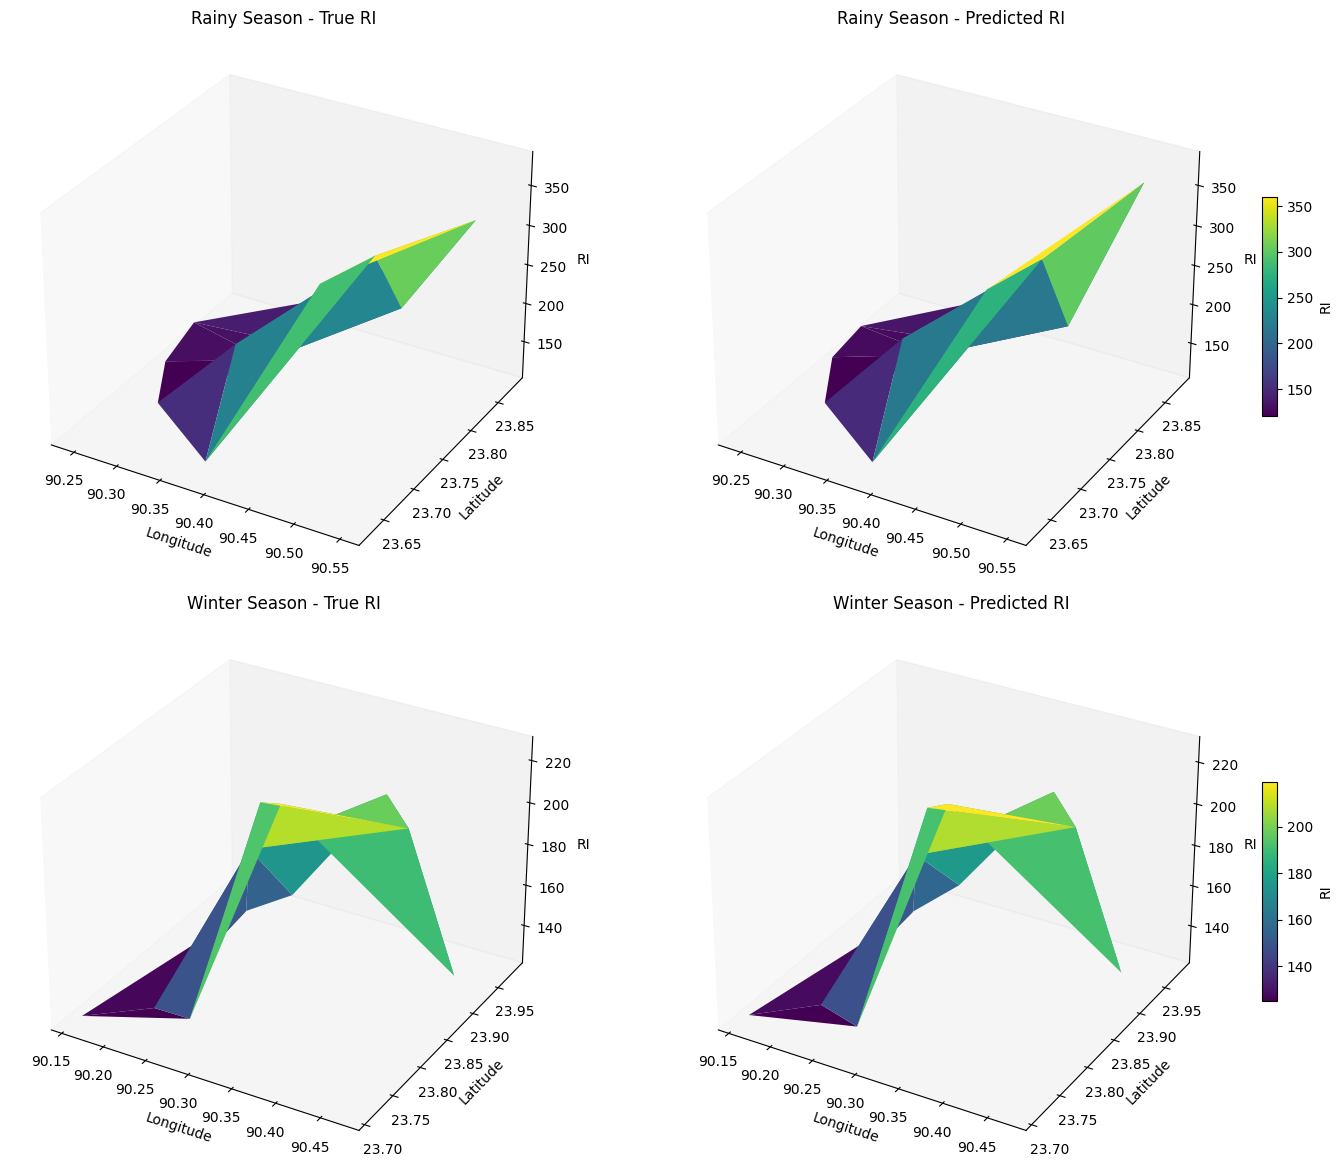

In [86]:
fig = plt.figure(figsize=(15, 12))
fig.suptitle('', fontsize=16)

# --- Subplot 1: Rainy Season - True RI ---
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf1 = ax1.plot_trisurf(
    rainy_data.Longitude,
    rainy_data.Latitude,
    rainy_data.YTrue,
    cmap='viridis',
    edgecolor='none'
)
ax1.set_title('Rainy Season - True RI')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('RI')
ax1.grid(False)

# --- Subplot 2: Rainy Season - Predicted RI ---
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
surf2 = ax2.plot_trisurf(
    rainy_data.Longitude,
    rainy_data.Latitude,
    rainy_data.YPred,
    cmap='viridis',
    edgecolor='none'
)
ax2.set_title('Rainy Season - Predicted RI')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('RI')
ax2.grid(False)
fig.colorbar(surf2, ax=ax2, shrink=0.4, aspect=15, label='RI')

# --- Subplot 3: Winter Season - True RI ---
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
surf3 = ax3.plot_trisurf(
    winter_data.Longitude,
    winter_data.Latitude,
    winter_data.YTrue,
    cmap='viridis',
    edgecolor='none'
)
ax3.set_title('Winter Season - True RI')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_zlabel('RI')
ax3.grid(False)

# --- Subplot 4: Winter Season - Predicted RI ---
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
surf4 = ax4.plot_trisurf(
    winter_data.Longitude,
    winter_data.Latitude,
    winter_data.YPred,
    cmap='viridis',
    edgecolor='none'
)
ax4.set_title('Winter Season - Predicted RI')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.set_zlabel('RI')
ax4.grid(False)
fig.colorbar(surf4, ax=ax4, shrink=0.4, aspect=15, label='RI')

plt.tight_layout()
plt.show()

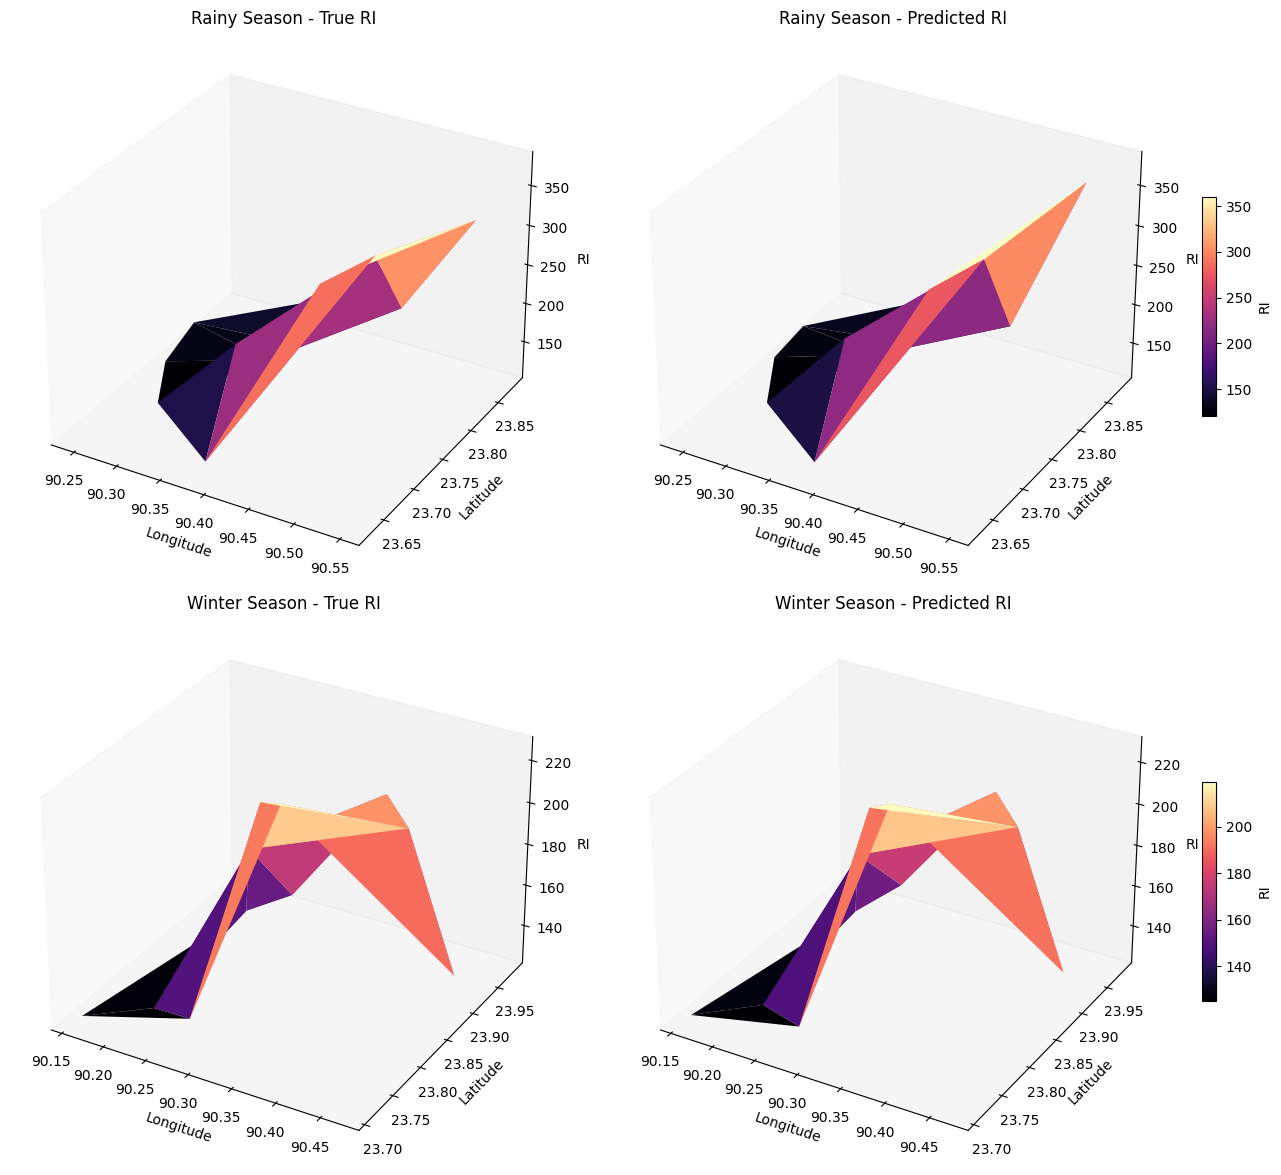

In [90]:
fig = plt.figure(figsize=(14, 12))
fig.suptitle('', fontsize=16)

# --- Subplot 1: Rainy Season - True RI ---
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf1 = ax1.plot_trisurf(
    rainy_data.Longitude,
    rainy_data.Latitude,
    rainy_data.YTrue,
    cmap='magma',
    edgecolor='none'
)
ax1.set_title('Rainy Season - True RI')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('RI')
ax1.grid(False)

# --- Subplot 2: Rainy Season - Predicted RI ---
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
surf2 = ax2.plot_trisurf(
    rainy_data.Longitude,
    rainy_data.Latitude,
    rainy_data.YPred,
    cmap='magma',
    edgecolor='none'
)
ax2.set_title('Rainy Season - Predicted RI')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('RI')
ax2.grid(False)
fig.colorbar(surf2, ax=ax2, shrink=0.4, aspect=15, label='RI')

# --- Subplot 3: Winter Season - True RI ---
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
surf3 = ax3.plot_trisurf(
    winter_data.Longitude,
    winter_data.Latitude,
    winter_data.YTrue,
    cmap='magma',
    edgecolor='none'
)
ax3.set_title('Winter Season - True RI')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_zlabel('RI')
ax3.grid(False)

# --- Subplot 4: Winter Season - Predicted RI ---
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
surf4 = ax4.plot_trisurf(
    winter_data.Longitude,
    winter_data.Latitude,
    winter_data.YPred,
    cmap='magma',
    edgecolor='none'
)
ax4.set_title('Winter Season - Predicted RI')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.set_zlabel('RI')
ax4.grid(False)
fig.colorbar(surf4, ax=ax4, shrink=0.4, aspect=15, label='RI')

plt.tight_layout()
plt.savefig("../RainyWinterGroundTruthSediment.png", dpi = 500)
plt.show()

## Feature Importance

In [ ]:
Permutation
- MLP_PbW: 0.2298
- MLP_FeW: 0.2049
- CNN_all_rasters: 0.1421
- MLP_CdW: 0.1228
- MLP_NiW: 0.0538
- MLP_SiltW: 0.0468
- MLP_CuW: 0.0460
- MLP_hydro_dist_ind: 0.0314
- MLP_AsW: 0.0191
- MLP_MW: 0.0070
- MLP_hydro_dist_brick: 0.0069
- MLP_SandW: 0.0052
- MLP_ClayW: 0.0049
- MLP_CrW: 0.0041
- MLP_num_industry: 0.0012
- GNN_distance_matrix: 0.0001
- MLP_num_brick_field: -0.0008

Lime
  - PbW: 291.3201
  - FeW: 229.6694
  - CdW: 174.8315
  - NiW: 151.1109
  - CuW: 111.1672
  - hydro_dist_ind: 106.6920
  - SandW: 80.9444
  - num_industry: 59.2139
  - num_brick_field: 58.7753
  - ClayW: 44.1919
  - hydro_dist_brick: 42.7179
  - AsW: 38.6554
  - SiltW: 37.9075
  - MW: 35.4297
  - GNN_f33: 28.5935
  - CrW: 28.3064
  - GNN_f21: 24.4288
  - GNN_f3: 23.7243
  - GNN_f31: 22.6324
  - GNN_f58: 22.2767

In [108]:
import pandas as pd
import io

permutation_data_str = """
- IDW Pb: 0.2298
- IDW Fe: 0.2049
- CNN All Rasters: 0.1421
- IDW Cd: 0.1228
- IDW Ni: 0.0538
- IDW Silt: 0.0468
- IDW Cu: 0.0460
- Hydro Dist Ind: 0.0314
- IDW As: 0.0191
- IDW Moisture: 0.0070
- Hydro Dist Brick: 0.0069
- IDW Sand: 0.0052
- IDW Clay: 0.0049
- IDW Cr: 0.0041
- Num Industry: 0.0012
- GNN Distance Matrix: 0.0001
- Num Brick Field: -0.0008
"""

lime_data_str = """
- IDW Pb: 291.3201
- IDW Fe: 229.6694
- IDW Cd: 174.8315
- IDW Ni: 151.1109
- IDW Cu: 111.1672
- Hydro Dist Ind: 106.6920
- IDW Sand: 80.9444
- Num Industry: 59.2139
- Num Brick Field: 58.7753
- IDW Clay: 44.1919
- Hydro Dist Brick: 42.7179
- IDW As: 38.6554
- IDW Silt: 37.9075
- IDW Moisture: 35.4297
- IDW Cr: 28.3064
"""

# Function to parse the data strings into a list of lists
def parse_data(data_str):
    lines = data_str.strip().split('\n')
    parsed_data = []
    for line in lines:
        parts = line.split(':')
        feature = parts[0].strip().lstrip('-').strip()
        value = float(parts[1].strip())
        parsed_data.append([feature, value])
    return parsed_data

permutation_list = parse_data(permutation_data_str)
t_permutation = pd.DataFrame(permutation_list, columns=['Feature', 'Importance'])

lime_list = parse_data(lime_data_str)
t_lime = pd.DataFrame(lime_list, columns=['Feature', 'Importance'])

t_permutation, t_lime

(                Feature  Importance
 0                IDW Pb      0.2298
 1                IDW Fe      0.2049
 2       CNN All Rasters      0.1421
 3                IDW Cd      0.1228
 4                IDW Ni      0.0538
 5              IDW Silt      0.0468
 6                IDW Cu      0.0460
 7        Hydro Dist Ind      0.0314
 8                IDW As      0.0191
 9          IDW Moisture      0.0070
 10     Hydro Dist Brick      0.0069
 11             IDW Sand      0.0052
 12             IDW Clay      0.0049
 13               IDW Cr      0.0041
 14         Num Industry      0.0012
 15  GNN Distance Matrix      0.0001
 16      Num Brick Field     -0.0008,
              Feature  Importance
 0             IDW Pb    291.3201
 1             IDW Fe    229.6694
 2             IDW Cd    174.8315
 3             IDW Ni    151.1109
 4             IDW Cu    111.1672
 5     Hydro Dist Ind    106.6920
 6           IDW Sand     80.9444
 7       Num Industry     59.2139
 8    Num Brick Field     5

In [109]:
t_permutation.to_csv("../SedimentWinter/FeaturesImportance/t_permutation.csv")
t_lime.to_csv("../SedimentWinter/FeaturesImportance/t_lime.csv")

In [ ]:
Permutation
  - CdW.tif: 0.2251
  - NiW: 0.0752
  - NiW.tif: 0.0664
  - PbW: 0.0580
  - CdW: 0.0561
  - SiltW: 0.0473
  - CuW.tif: 0.0375
  - SiltW.tif: 0.0366
  - PbW.tif: 0.0298
  - ClayW.tif: 0.0295
  - FeW: 0.0221
  - MW: 0.0179
  - CuW: 0.0160
  - CrW.tif: 0.0135
  - AsW.tif: 0.0088
  - ClayW: 0.0060
  - SandW: 0.0058
  - hydro_dist_ind: 0.0000
  - bui.tif: 0.0000
  - ndsi.tif: 0.0000
  - savi.tif: 0.0000
  - ndbsi.tif: 0.0000
  - ui.tif: 0.0000
  - ndwi.tif: 0.0000
  - ndbi.tif: 0.0000
  - awei.tif: 0.0000
  - evi.tif: 0.0000
  - mndwi.tif: 0.0000
  - ndvi.tif: 0.0000
  - LULC2020.tif: 0.0000
  - LULC2021.tif: 0.0000
  - LULC2022.tif: 0.0000
  - LULC2019.tif: 0.0000
  - LULC2018.tif: 0.0000
  - LULC2017.tif: 0.0000
  - hydro_dist_brick: -0.0000
  - num_brick_field: -0.0004
  - GNN: -0.0013
  - AsW: -0.0028
  - num_industry: -0.0030
  - CrW: -0.0037
  - SandW.tif: -0.0071

LIME 
    - FeW <= -0.83: -21.4701
    - -0.74 < PbW.tif <= -0.38: -11.2435
    - CuW <= -0.66: -9.7748
    - NiW <= -0.93: -9.6103
    - num_industry > -0.23: -9.0673
    - AsW.tif <= -0.67: -8.5499
    - CuW.tif <= -0.59: -7.7610
    - NiW.tif <= -0.82: -7.6522
    - SiltW.tif > 0.82: -6.3442
    - CrW.tif > 0.80: 5.7995
    - MW <= -0.74: -4.5122
    - -0.19 < SiltW <= 0.92: -4.0218
    - hydro_dist_brick <= -0.81: 3.1667
    - -0.32 < CdW <= 0.01: -2.8588
    - SandW <= -0.81: 2.8533
    - SandW.tif <= -0.80: -2.2819
    - num_brick_field > -0.26: -2.1924
    - -0.49 < PbW <= 1.11: 2.1685
    - hydro_dist_ind <= -0.67: -2.0769
    - -0.77 < ClayW.tif <= -0.12: -1.4519

In [98]:
import pandas as pd
import io

# Data for Permutation
permutation_data_str = """
- IDW Cd: 0.2251
- Ni: 0.0752
- IDW Ni: 0.0664
- Pb: 0.0580
- Cd: 0.0561
- Silt: 0.0473
- IDW Cu: 0.0375
- IDW Silt: 0.0366
- IDW Pb: 0.0298
- IDW Clay: 0.0295
- Fe: 0.0221
- Moisture: 0.0179
- Cu: 0.0160
- IDW Cr: 0.0135
- IDW As: 0.0088
- Clay: 0.0060
- Sand: 0.0058
- Hydro Dist Ind: 0.000034
- Hydro Dist Brick: -0.0000
- Num Brick Field: -0.0004
- As: -0.0028
- Num Industry: -0.0030
- Cr: -0.0037
- IDW Sand: -0.0071
"""

# Data for Lime
lime_data_str = """
- Fe <= -0.83: -21.4701
- -0.74 < Raster Pb <= -0.38: -11.2435
- Cu <= -0.66: -9.7748
- Ni <= -0.93: -9.6103
- Num Industry > -0.23: -9.0673
- IDW As <= -0.67: -8.5499
- IDW Cu <= -0.59: -7.7610
- IDW Ni <= -0.82: -7.6522
- IDW Silt > 0.82: -6.3442
- IDW Cr > 0.80: 5.7995
- Moisture <= -0.74: -4.5122
- -0.19 < Silt <= 0.92: -4.0218
- Hydro Dist Brick <= -0.81: 3.1667
- -0.32 < Cd <= 0.01: -2.8588
- Sand <= -0.81: 2.8533
- IDW Sand <= -0.80: -2.2819
- Num Brick Field > -0.26: -2.1924
- -0.49 < Pb <= 1.11: 2.1685
- Hydro Dist Ind <= -0.67: -2.0769
- -0.77 < IDW Clay <= -0.12: -1.4519
"""

# Function to parse the data strings into a list of lists
def parse_data(data_str):
    lines = data_str.strip().split('\n')
    parsed_data = []
    for line in lines:
        # Split line by the last colon to handle feature names with colons
        parts = line.rsplit(':', 1)
        feature = parts[0].strip().lstrip('-').strip()
        value = float(parts[1].strip())
        parsed_data.append([feature, value])
    return parsed_data

# Create the Permutation DataFrame
permutation_list = parse_data(permutation_data_str)
gma_permutation = pd.DataFrame(permutation_list, columns=['Feature', 'Importance'])

# Create the Lime DataFrame
lime_list = parse_data(lime_data_str)
gma_lime = pd.DataFrame(lime_list, columns=['Feature', 'Importance'])

# Print the DataFrames
print("Permutation DataFrame:")
print(gma_permutation.to_string())

print("\nLime DataFrame:")
print(gma_lime.to_string())

Permutation DataFrame:
             Feature  Importance
0             IDW Cd    0.225100
1                 Ni    0.075200
2             IDW Ni    0.066400
3                 Pb    0.058000
4                 Cd    0.056100
5               Silt    0.047300
6             IDW Cu    0.037500
7           IDW Silt    0.036600
8             IDW Pb    0.029800
9           IDW Clay    0.029500
10                Fe    0.022100
11          Moisture    0.017900
12                Cu    0.016000
13            IDW Cr    0.013500
14            IDW As    0.008800
15              Clay    0.006000
16              Sand    0.005800
17    Hydro Dist Ind    0.000034
18  Hydro Dist Brick   -0.000000
19   Num Brick Field   -0.000400
20                As   -0.002800
21      Num Industry   -0.003000
22                Cr   -0.003700
23          IDW Sand   -0.007100

Lime DataFrame:
                       Feature  Importance
0                  Fe <= -0.83    -21.4701
1   -0.74 < Raster Pb <= -0.38    -11.2435
2     

In [99]:
gma_permutation.to_csv("../SedimentWinter/FeaturesImportance/gma_permutation.csv")
gma_lime.to_csv("../SedimentWinter/FeaturesImportance/gma_lime.csv")

In [ ]:
permutation 
Raster_PbW.tif: 1.8036
Raster_NiW.tif: 0.1315
Raster_SiltW.tif: 0.0815
Raster_CrW.tif: 0.0520
Raster_AsW.tif: 0.0498
Raster_CuW.tif: 0.0405
Raster_SandW.tif: 0.0144
MLP_CuW: 0.0039
MLP_FeW: 0.0026
MLP_SiltW: 0.0023
MLP_MW: 0.0017
MLP_CrW: 0.0014
Raster_ClayW.tif: 0.0009
MLP_SandW: 0.0007
MLP_hydro_dist_ind: 0.0006
MLP_NiW: 0.0004
MLP_CdW: 0.0002
GNN: 0.0001
MLP_num_brick_field: 0.0001
MLP_num_industry: 0.0000
Raster_bui.tif: 0.0000
Raster_ndsi.tif: 0.0000
Raster_savi.tif: 0.0000
Raster_ndbsi.tif: 0.0000
Raster_ui.tif: 0.0000
Raster_ndwi.tif: 0.0000
Raster_ndbi.tif: 0.0000
Raster_awei.tif: 0.0000
Raster_evi.tif: 0.0000
Raster_mndwi.tif: 0.0000
Raster_ndvi.tif: 0.0000
Raster_LULC2020.tif: 0.0000
Raster_LULC2021.tif: 0.0000
Raster_LULC2022.tif: 0.0000
Raster_LULC2019.tif: 0.0000
Raster_LULC2018.tif: 0.0000
Raster_LULC2017.tif: 0.0000
Raster_CdW.tif: -0.0000
MLP_ClayW: -0.0002
MLP_hydro_dist_brick: -0.0002
MLP_AsW: -0.0004
MLP_PbW: -0.0010

LIME 
- FeW > 0.76: 2.6344
- PbW > -0.03: 1.9294
- CuW > -0.13: 1.7351
- num_brick_field <= -0.29: 0.9112
- NiW > 0.44: 0.8733
- -0.30 < SiltW <= 0.88: -0.6198
- -1.03 < CrW <= 0.64: -0.2316
- -0.36 < MW <= -0.10: -0.1238
- -0.07 < AsW <= 1.41: -0.1234
- -0.02 < SandW <= 1.36: -0.1224
- -0.59 < hydro_dist_ind <= -0.03: -0.1178
- -0.32 < ClayW <= -0.11: 0.0718
- num_industry <= -0.26: 0.0669
- CdW > -0.28: 0.0396
- hydro_dist_brick <= -0.76: -0.0193


In [104]:
import pandas as pd
import io

# Data for Permutation
permutation_data_str = """
- IDW Pb: 1.8036
- IDW Ni: 0.1315
- IDW Silt: 0.0815
- IDW Cr: 0.0520
- IDW As: 0.0498
- IDW Cu: 0.0405
- IDW Sand: 0.0144
- Cu: 0.0039
- Fe : 0.0026
- Silt: 0.0023
- Moisture: 0.0017
- Cr: 0.0014
- IDW Clay: 0.0009
- Sand: 0.0007
- Hydro Dist Ind: 0.0006
- Ni: 0.0004
- Cd: 0.0002
- Num Brick Field: 0.0001
- Num Industry: 0.000005
- IDW Cd: -0.00001
- Clay: -0.0002
- Hydro Dist Brick: -0.0002
- As: -0.0004
- Pb: -0.0010
"""

# Data for Lime
lime_data_str = """
- IDW Fe > 0.76: 2.6344
- IDW Pb > -0.03: 1.9294
- IDW Cu > -0.13: 1.7351
- Num Brick Field <= -0.29: 0.9112
- IDW Ni > 0.44: 0.8733
- -0.30 < IDW Silt <= 0.88: -0.6198
- -1.03 < IDW Cr <= 0.64: -0.2316
- -0.36 < IDW Moisture <= -0.10: -0.1238
- -0.07 < IDW As <= 1.41: -0.1234
- -0.02 < IDW Sand <= 1.36: -0.1224
- -0.59 < Hydro Dist Ind <= -0.03: -0.1178
- -0.32 < IDW Clay <= -0.11: 0.0718
- Num Industry <= -0.26: 0.0669
- IDW Cd > -0.28: 0.0396
- Hydro Dist Brick <= -0.76: -0.0193
"""

# Function to parse the data strings into a list of lists
def parse_data(data_str):
    lines = data_str.strip().split('\n')
    parsed_data = []
    for line in lines:
        # Split line by the last colon to handle feature names with colons
        parts = line.rsplit(':', 1)
        feature = parts[0].strip().lstrip('-').strip()
        value = float(parts[1].strip())
        parsed_data.append([feature, value])
    return parsed_data

# Create the Permutation DataFrame
permutation_list = parse_data(permutation_data_str)
gm_permutation = pd.DataFrame(permutation_list, columns=['Feature', 'Importance'])

# Create the Lime DataFrame
lime_list = parse_data(lime_data_str)
gm_lime = pd.DataFrame(lime_list, columns=['Feature', 'Importance'])

# Print the DataFrames
print("Permutation DataFrame:")
print(gm_permutation.to_string())

print("\nLime DataFrame:")
print(gm_lime.to_string())


Permutation DataFrame:
             Feature  Importance
0             IDW Pb    1.803600
1             IDW Ni    0.131500
2           IDW Silt    0.081500
3             IDW Cr    0.052000
4             IDW As    0.049800
5             IDW Cu    0.040500
6           IDW Sand    0.014400
7                 Cu    0.003900
8                 Fe    0.002600
9               Silt    0.002300
10          Moisture    0.001700
11                Cr    0.001400
12          IDW Clay    0.000900
13              Sand    0.000700
14    Hydro Dist Ind    0.000600
15                Ni    0.000400
16                Cd    0.000200
17   Num Brick Field    0.000100
18      Num Industry    0.000005
19            IDW Cd   -0.000010
20              Clay   -0.000200
21  Hydro Dist Brick   -0.000200
22                As   -0.000400
23                Pb   -0.001000

Lime DataFrame:
                            Feature  Importance
0                     IDW Fe > 0.76      2.6344
1                    IDW Pb > -0.03    

In [105]:
gm_permutation.to_csv("../SedimentWinter/FeaturesImportance/gm_permutation.csv")
gm_lime.to_csv("../SedimentWinter/FeaturesImportance/gm_lime.csv")

In [ ]:
t_permutation
t_lime
gma_permutation
gma_lime
gm_permutation
gm_lime

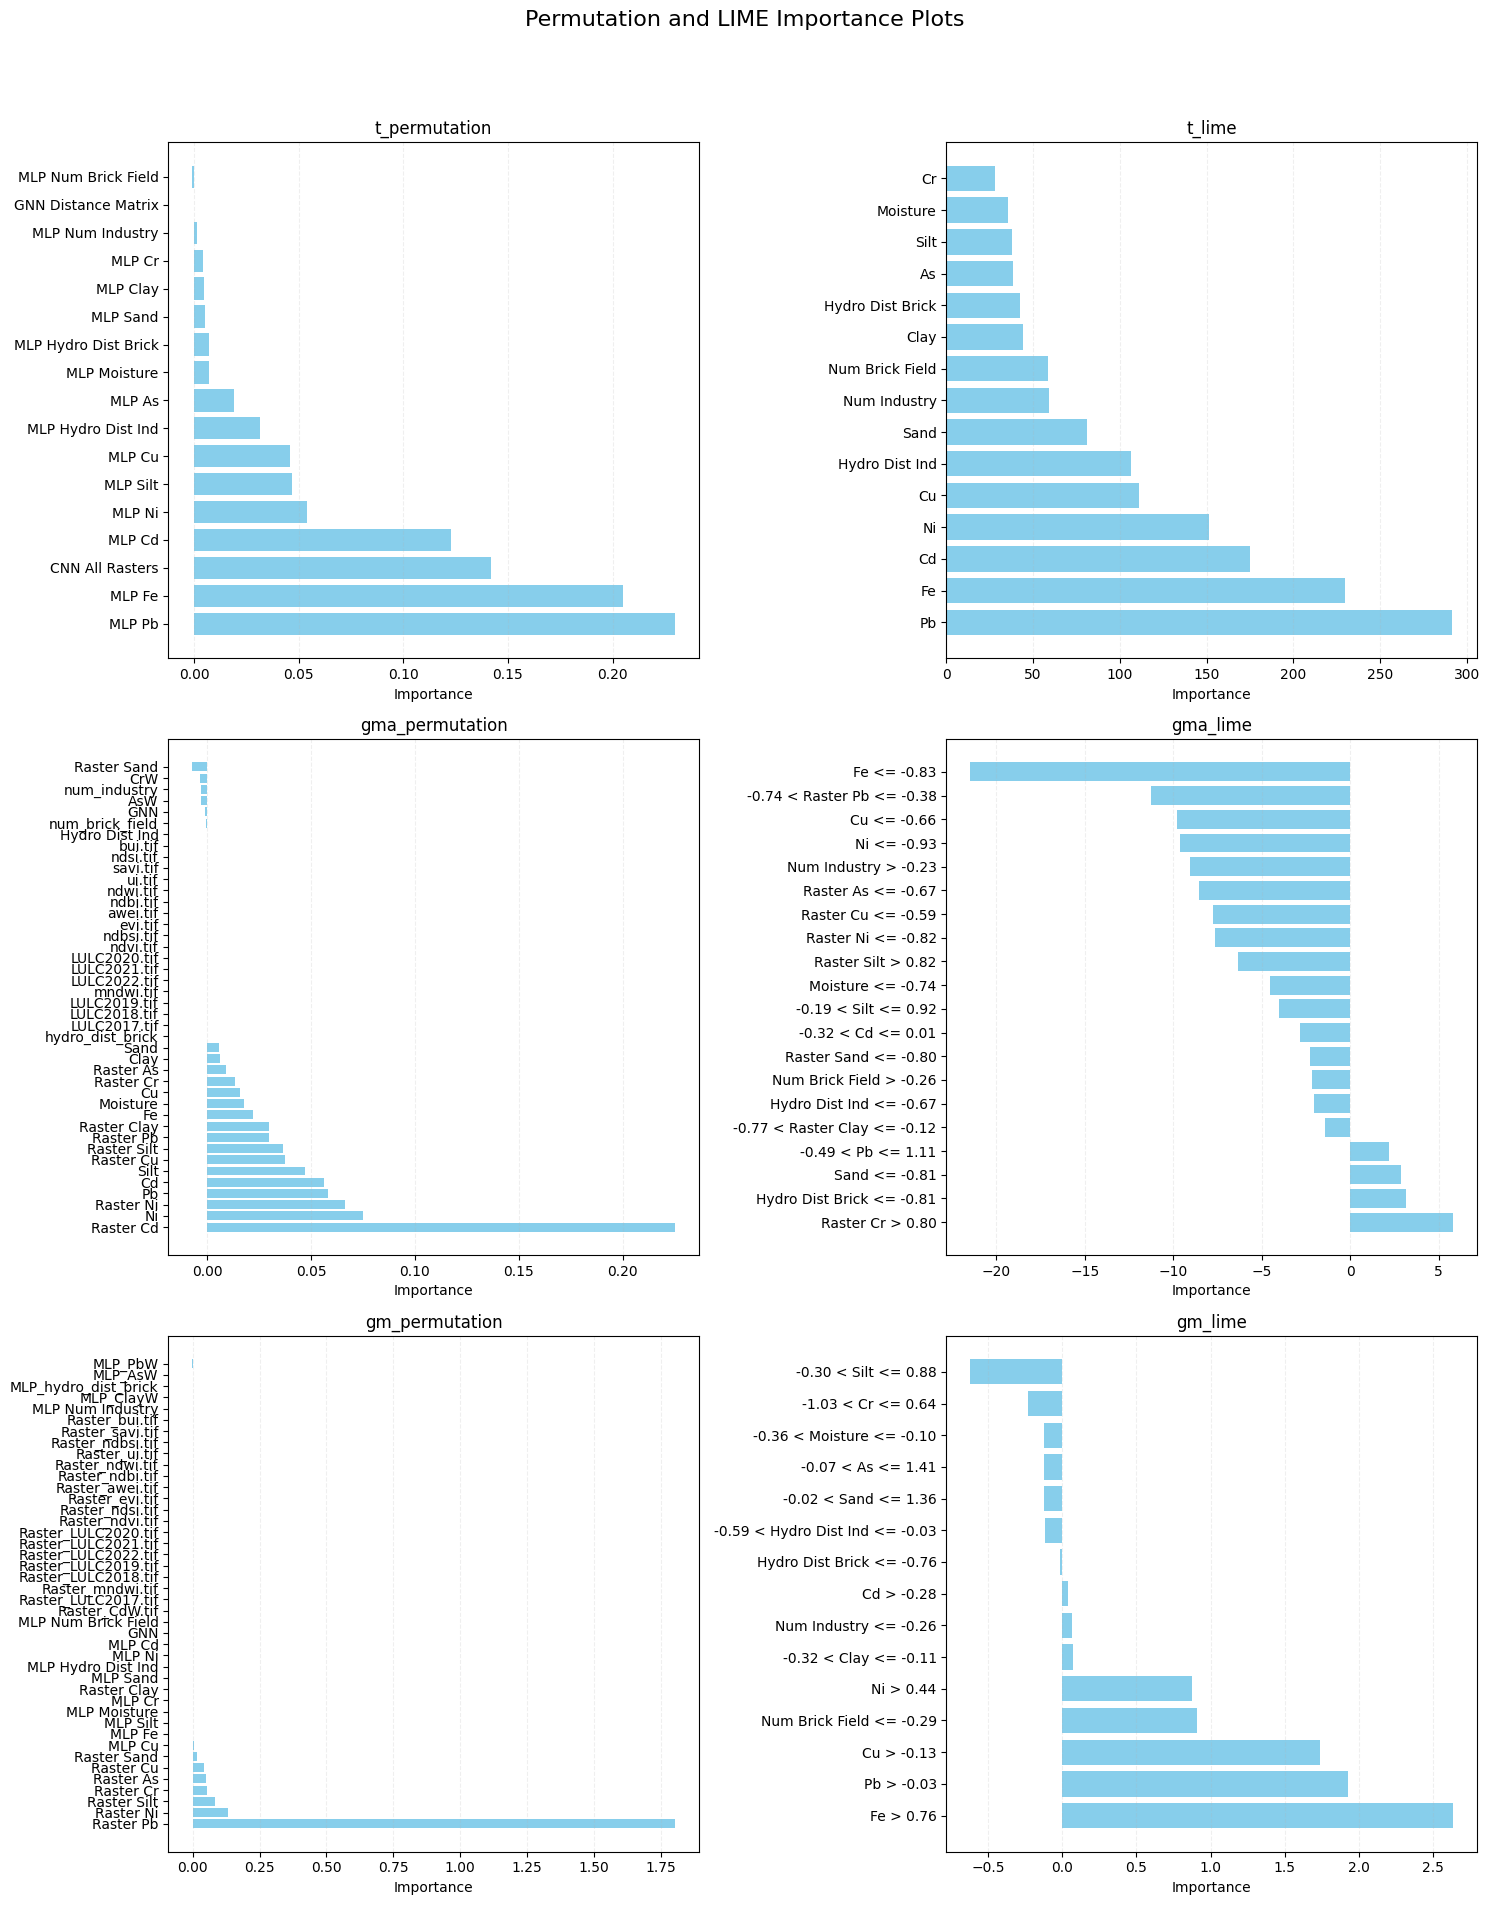

In [114]:
# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
fig.suptitle('Permutation and LIME Importance Plots', fontsize=16)

def plot_dataframe(ax, df, title):
    """Helper function to plot a dataframe on a given axes."""
    df_sorted = df.sort_values(by='Importance', ascending=False)
    ax.barh(df_sorted['Feature'], df_sorted['Importance'], color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('Importance')
    ax.grid(axis='x', linestyle='--', alpha=0.2)

# Row 1: t_permutation and t_lime
plot_dataframe(axes[0, 0], t_permutation, 't_permutation')
plot_dataframe(axes[0, 1], t_lime, 't_lime')

# Row 2: gma_permutation and gma_lime
plot_dataframe(axes[1, 0], gma_permutation, 'gma_permutation')
plot_dataframe(axes[1, 1], gma_lime, 'gma_lime')

# Row 3: gm_permutation and gm_lime
plot_dataframe(axes[2, 0], gm_permutation, 'gm_permutation')
plot_dataframe(axes[2, 1], gm_lime, 'gm_lime')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Feature Importance Plot

In [28]:
winter_p1 = pd.read_csv("../SedimentWinter/FeaturesImportance/t_permutation.csv", index_col="Unnamed: 0") 
winter_l1 = pd.read_csv("../SedimentWinter/FeaturesImportance/t_lime.csv", index_col="Unnamed: 0") 

winter_p2 = pd.read_csv("../SedimentWinter/FeaturesImportance/gm_permutation.csv", index_col="Unnamed: 0") 
winter_l2 = pd.read_csv("../SedimentWinter/FeaturesImportance/gm_lime.csv", index_col="Unnamed: 0") 

winter_p3 = pd.read_csv("../SedimentWinter/FeaturesImportance/gma_permutation.csv", index_col="Unnamed: 0") 
winter_l3 = pd.read_csv("../SedimentWinter/FeaturesImportance/gma_lime.csv", index_col="Unnamed: 0") 

rainy_p1 = pd.read_csv("FeatureImportance/t_permutation.csv", index_col="Unnamed: 0") 
rainy_l1 = pd.read_csv("FeatureImportance/t_lime.csv", index_col="Unnamed: 0") 

rainy_p2 = pd.read_csv("FeatureImportance/gma_permutation.csv", index_col="Unnamed: 0") 
rainy_l2 = pd.read_csv("FeatureImportance/gma_lime.csv", index_col="Unnamed: 0") 

rainy_p3 = pd.read_csv("FeatureImportance/cgmp_permutation.csv", index_col="Unnamed: 0") 
rainy_l3 = pd.read_csv("FeatureImportance/cgmp_lime.csv", index_col="Unnamed: 0") 

In [29]:
rainy_p3.columns, rainy_l3.columns

(Index(['Feature', 'Importance'], dtype='object'),
 Index(['Feature', 'Importance'], dtype='object'))

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all the dataframes
try:
    winter_p1 = pd.read_csv("../SedimentWinter/FeaturesImportance/t_permutation.csv", index_col="Feature")
    winter_l1 = pd.read_csv("../SedimentWinter/FeaturesImportance/t_lime.csv", index_col="Feature")
    winter_p2 = pd.read_csv("../SedimentWinter/FeaturesImportance/gm_permutation.csv", index_col="Feature")
    winter_l2 = pd.read_csv("../SedimentWinter/FeaturesImportance/gm_lime.csv", index_col="Feature")
    winter_p3 = pd.read_csv("../SedimentWinter/FeaturesImportance/gma_permutation.csv", index_col="Feature")
    winter_l3 = pd.read_csv("../SedimentWinter/FeaturesImportance/gma_lime.csv", index_col="Feature")
    rainy_p1 = pd.read_csv("FeatureImportance/t_permutation.csv", index_col="Feature")
    rainy_l1 = pd.read_csv("FeatureImportance/t_lime.csv", index_col="Feature")
    rainy_p2 = pd.read_csv("FeatureImportance/gma_permutation.csv", index_col="Feature")
    rainy_l2 = pd.read_csv("FeatureImportance/gma_lime.csv", index_col="Feature")
    rainy_p3 = pd.read_csv("FeatureImportance/cgmp_permutation.csv", index_col="Feature")
    rainy_l3 = pd.read_csv("FeatureImportance/cgmp_lime.csv", index_col="Feature")
except FileNotFoundError as e:
    print(f"Error: One of the CSV files was not found. Please check the file paths. {e}")
    exit()
'''
# Create a figure with 4 rows and 3 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))
fig.suptitle('', fontsize=20, y=0.98)

# Define the colormap
cmap = plt.cm.get_cmap('cividis')

# Plotting the dataframes
def plot_dataframe(ax, df, title):
    """Helper function to plot a dataframe on a given axes with magma colors."""
    # Sort the dataframe by 'Importance' to order the y-values
    df_sorted = df.sort_values(by='Importance', ascending=True)
    
    # Normalize importance values for colormap
    min_val = df_sorted['Importance'].min()
    max_val = df_sorted['Importance'].max()
    norm = plt.Normalize(min_val, max_val)
    colors = cmap(norm(df_sorted['Importance']))
    
    ax.barh(df_sorted.index, df_sorted['Importance'], color=colors)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Importance', fontsize=10)
    ax.grid(axis='x', linestyle='--', alpha=0.1)
    ax.tick_params(axis='both', which='major', labelsize=8)


plot_dataframe(axes[0, 0], rainy_p1, 'Rainy Transformer CNN GNN MLP Permutation')
plot_dataframe(axes[0, 1], rainy_p2, 'Rainy GNN MLP AE Permutation')
plot_dataframe(axes[0, 2], rainy_p3, 'Rainy CNN GNN MLP PG Permutation')

plot_dataframe(axes[1, 0], rainy_l1, 'Rainy Transformer CNN GNN MLP LIME')
plot_dataframe(axes[1, 1], rainy_l2, 'Rainy GNN MLP AE LIME')
plot_dataframe(axes[1, 2], rainy_l3, 'Rainy CNN GNN MLP PG LIME')

plot_dataframe(axes[2, 0], winter_p1, 'Winter Transformer CNN GNN MLP Permutation')
plot_dataframe(axes[2, 1], winter_p2, 'Winter GNN MLP Permutation')
plot_dataframe(axes[2, 2], winter_p3, 'Winter GNN MLP AE Permutation')

# Row 2: Winter LIME
plot_dataframe(axes[3, 0], winter_l1, 'Winter Transformer CNN GNN MLP LIME')
plot_dataframe(axes[3, 1], winter_l2, 'Winter GNN MLP LIME')
plot_dataframe(axes[3, 2], winter_l3, 'Winter GNN MLP AE 3 LIME')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
'''

'\n# Create a figure with 4 rows and 3 columns\nfig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))\nfig.suptitle(\'\', fontsize=20, y=0.98)\n\n# Define the colormap\ncmap = plt.cm.get_cmap(\'cividis\')\n\n# Plotting the dataframes\ndef plot_dataframe(ax, df, title):\n    """Helper function to plot a dataframe on a given axes with magma colors."""\n    # Sort the dataframe by \'Importance\' to order the y-values\n    df_sorted = df.sort_values(by=\'Importance\', ascending=True)\n    \n    # Normalize importance values for colormap\n    min_val = df_sorted[\'Importance\'].min()\n    max_val = df_sorted[\'Importance\'].max()\n    norm = plt.Normalize(min_val, max_val)\n    colors = cmap(norm(df_sorted[\'Importance\']))\n    \n    ax.barh(df_sorted.index, df_sorted[\'Importance\'], color=colors)\n    ax.set_title(title, fontsize=12)\n    ax.set_xlabel(\'Importance\', fontsize=10)\n    ax.grid(axis=\'x\', linestyle=\'--\', alpha=0.1)\n    ax.tick_params(axis=\'both\', which=\'majo

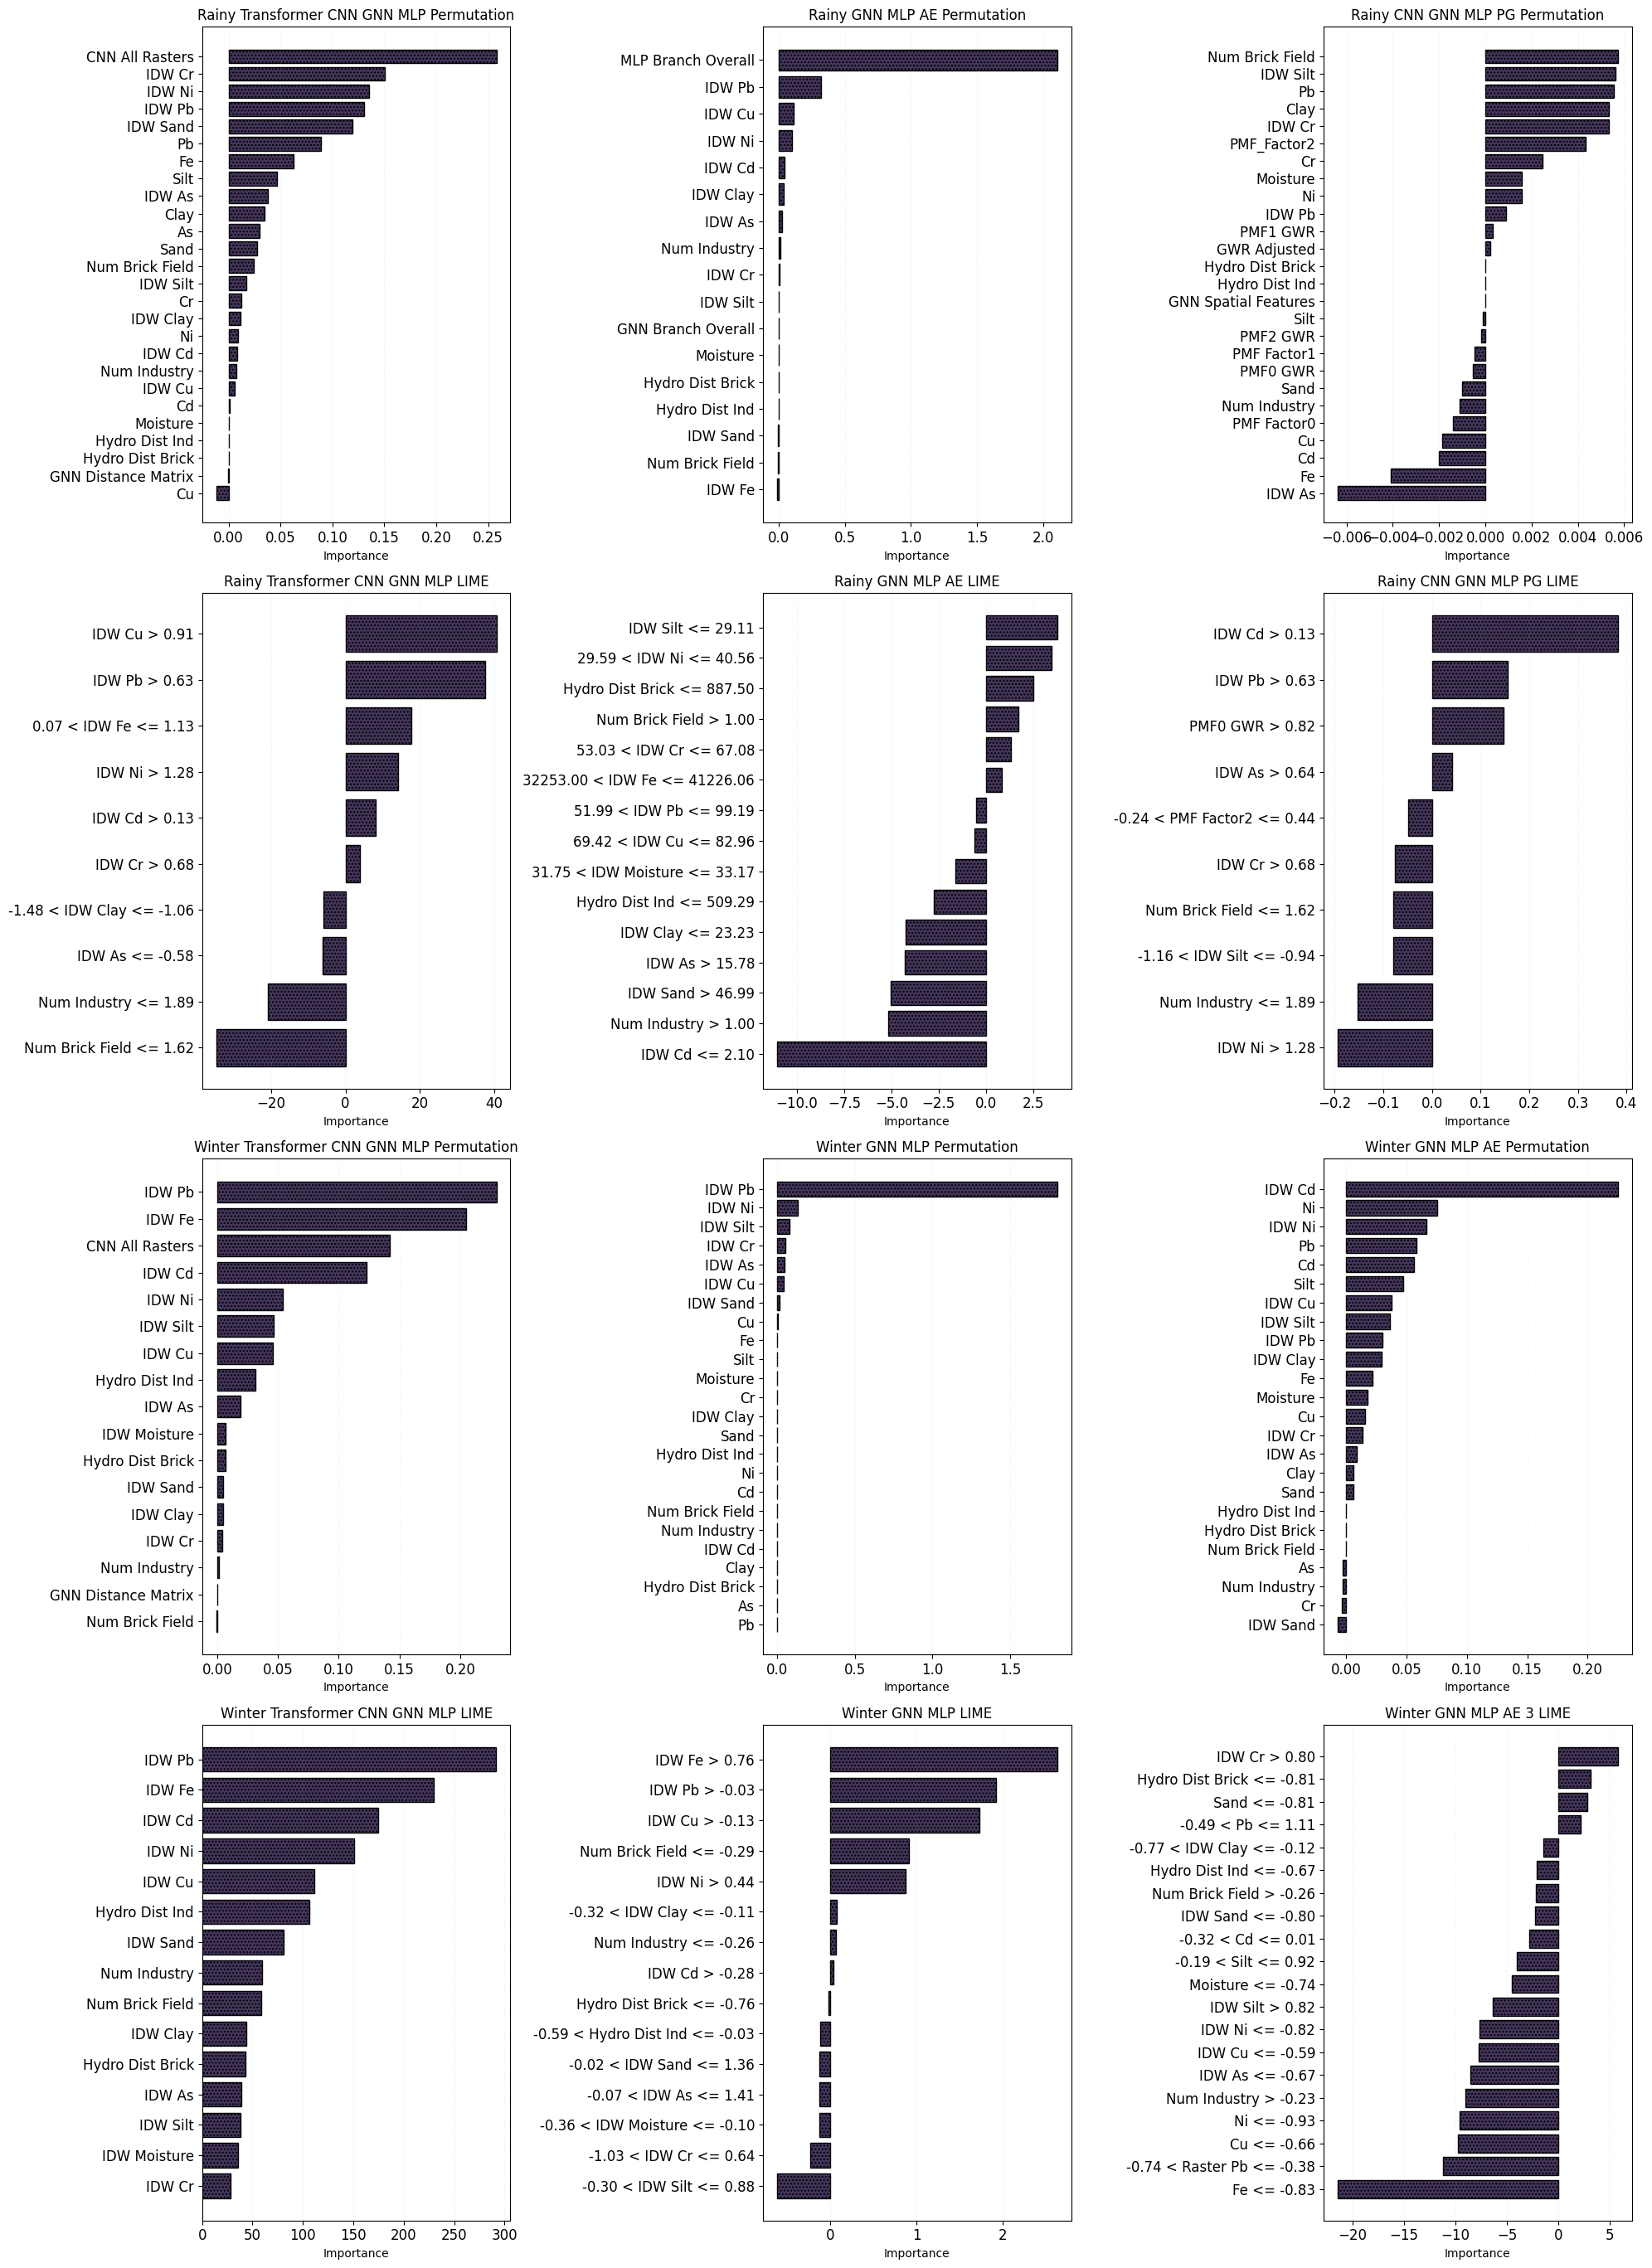

In [112]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 30))
fig.suptitle('', fontsize=20, y=0.98)

# Define the styling for the bars
bar_color = '#44355b'
edge_color = 'black'
hatches = ['....'] 

# Plotting the dataframes
def plot_dataframe(ax, df, title):
    """Helper function to plot a dataframe on a given axes with the specified styling."""
    # Sort the dataframe by 'Importance' to order the y-values
    df_sorted = df.sort_values(by='Importance', ascending=True)
    
    # Get the number of features to determine the number of hatches to apply
    num_features = len(df_sorted)
    applied_hatches = np.tile(hatches, (num_features // len(hatches)) + 1)[:num_features]
    
    ax.barh(df_sorted.index, df_sorted['Importance'], color=bar_color, edgecolor=edge_color, hatch=applied_hatches)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Importance', fontsize=10)
    ax.grid(axis='x', linestyle='--', alpha=0.1)
    ax.tick_params(axis='both', which='major', labelsize=12)

plot_dataframe(axes[0, 0], rainy_p1, 'Rainy Transformer CNN GNN MLP Permutation')
plot_dataframe(axes[0, 1], rainy_p2, 'Rainy GNN MLP AE Permutation')
plot_dataframe(axes[0, 2], rainy_p3, 'Rainy CNN GNN MLP PG Permutation')

plot_dataframe(axes[1, 0], rainy_l1, 'Rainy Transformer CNN GNN MLP LIME')
plot_dataframe(axes[1, 1], rainy_l2, 'Rainy GNN MLP AE LIME')
plot_dataframe(axes[1, 2], rainy_l3, 'Rainy CNN GNN MLP PG LIME')

plot_dataframe(axes[2, 0], winter_p1, 'Winter Transformer CNN GNN MLP Permutation')
plot_dataframe(axes[2, 1], winter_p2, 'Winter GNN MLP Permutation')
plot_dataframe(axes[2, 2], winter_p3, 'Winter GNN MLP AE Permutation')

# Row 2: Winter LIME
plot_dataframe(axes[3, 0], winter_l1, 'Winter Transformer CNN GNN MLP LIME')
plot_dataframe(axes[3, 1], winter_l2, 'Winter GNN MLP LIME')
plot_dataframe(axes[3, 2], winter_l3, 'Winter GNN MLP AE 3 LIME')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("FeatureImportance/WinterRainy.png", dpi=500)
plt.show()

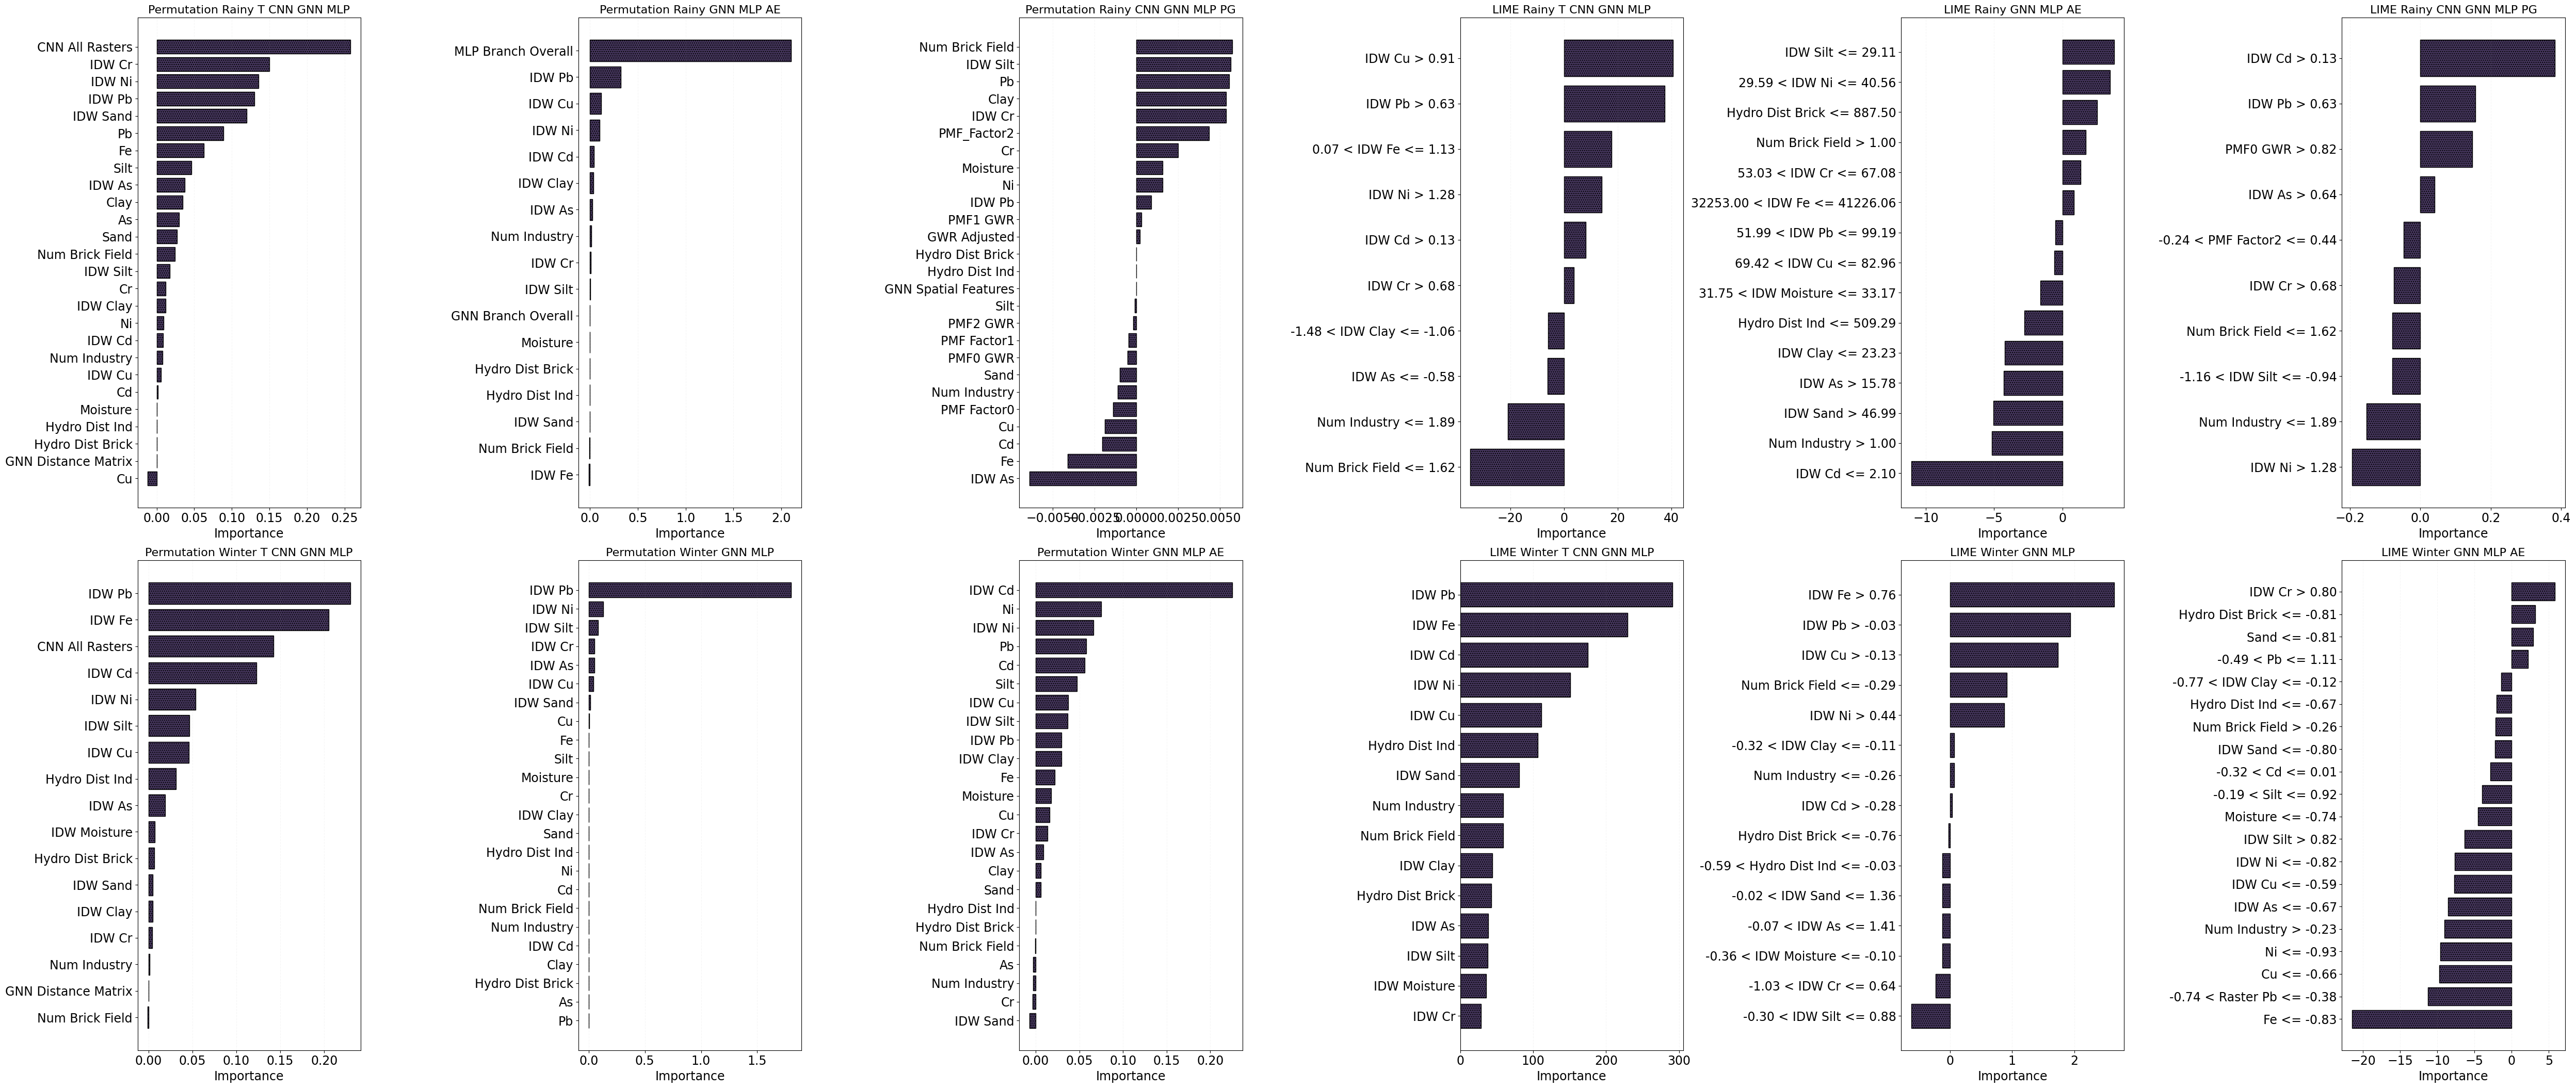

In [138]:
# Create a figure with 2 rows and 6 columns
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(50, 22))
fig.suptitle('', fontsize=30, y=0.98)

# Plotting the dataframes
def plot_dataframe(ax, df, title):
    """Helper function to plot a dataframe on a given axes with the specified styling."""
    # Sort the dataframe by 'Importance' to order the y-values
    df_sorted = df.sort_values(by='Importance', ascending=True)
    
    # Get the number of features to determine the number of hatches to apply
    num_features = len(df_sorted)
    applied_hatches = np.tile(hatches, (num_features // len(hatches)) + 1)[:num_features]
    
    ax.barh(df_sorted.index, df_sorted['Importance'], color=bar_color, edgecolor=edge_color, hatch=applied_hatches)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Importance', fontsize=17)
    ax.grid(axis='x', linestyle='--', alpha=0.1)
    ax.tick_params(axis='both', which='major', labelsize=17)

# Row 1: Permutation Plots
plot_dataframe(axes[0, 0], rainy_p1, 'Permutation Rainy T CNN GNN MLP')
plot_dataframe(axes[0, 1], rainy_p2, 'Permutation Rainy GNN MLP AE')
plot_dataframe(axes[0, 2], rainy_p3, 'Permutation Rainy CNN GNN MLP PG')
plot_dataframe(axes[0, 3], rainy_l1, 'LIME Rainy T CNN GNN MLP')
plot_dataframe(axes[0, 4], rainy_l2, 'LIME Rainy GNN MLP AE')
plot_dataframe(axes[0, 5], rainy_l3, 'LIME Rainy CNN GNN MLP PG')


plot_dataframe(axes[1, 0], winter_p1, 'Permutation Winter T CNN GNN MLP')
plot_dataframe(axes[1, 1], winter_p2, 'Permutation Winter GNN MLP')
plot_dataframe(axes[1, 2], winter_p3, 'Permutation Winter GNN MLP AE')
plot_dataframe(axes[1, 3], winter_l1, 'LIME Winter T CNN GNN MLP')
plot_dataframe(axes[1, 4], winter_l2, 'LIME Winter GNN MLP')
plot_dataframe(axes[1, 5], winter_l3, 'LIME Winter GNN MLP AE')

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig("FeatureImportance/WinterRainy63.png", dpi=500)
plt.show()